In [36]:
"""from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Dataset/IUM
"""
#Uncomment for colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Dataset/IUM


' '

In [37]:
"""import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Data')"""

"import os\nos.chdir('/content/drive/My Drive/Colab Notebooks/Data')"

In [75]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

# Analisi del dataset

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
appearances = pd.read_csv('appearances.csv')
club_games = pd.read_csv('club_games.csv')
clubs = pd.read_csv('clubs.csv')
competitions = pd.read_csv('competitions.csv')
game_events = pd.read_csv('game_events.csv')
game_lineups = pd.read_csv('game_lineups.csv')
games = pd.read_csv('games.csv')
player_valuations = pd.read_csv('player_valuations.csv')
players = pd.read_csv('players.csv')

# Display first few rows of each dataset
appearances.head(2), club_games.head(2), clubs.head(2), competitions.head(2), game_events.head(2), game_lineups.head(2), games.head(2), player_valuations.head(2), players.head(2)


(   appearance_id  game_id  player_id  player_club_id  player_current_club_id  \
 0  2231978_38004  2231978      38004             853                     235   
 1  2233748_79232  2233748      79232            8841                    2698   
 
          date       player_name competition_id  yellow_cards  red_cards  \
 0  2012-07-03  Aurélien Joachim            CLQ             0          0   
 1  2012-07-05    Ruslan Abyshov            ELQ             0          0   
 
    goals  assists  minutes_played  
 0      2        0              90  
 1      0        0              90  ,
    game_id  club_id  own_goals  own_position  own_manager_name  opponent_id  \
 0  2221751      431          1           NaN     Lutz Göttling           60   
 1  2221755       83          3           NaN  Ralph Hasenhüttl         4795   
 
    opponent_goals  opponent_position opponent_manager_name hosting  is_win  
 0               2                NaN     Christian Streich    Home       0  
 1             

In [39]:
appearances.describe(), club_games.describe(), clubs.describe(), competitions.describe(), game_events.describe(), game_lineups.describe(), games.describe(), player_valuations.describe(), players.describe()


(            game_id     player_id  player_club_id  player_current_club_id  \
 count  1.507351e+06  1.507351e+06    1.507351e+06            1.507351e+06   
 mean   3.014718e+06  1.798913e+05    2.881502e+03            3.638909e+03   
 std    5.570794e+05  1.652259e+05    7.113885e+03            9.309395e+03   
 min    2.211607e+06  1.000000e+01    1.000000e+00           -1.000000e+00   
 25%    2.518634e+06  5.369600e+04    2.890000e+02            3.360000e+02   
 50%    2.917390e+06  1.271420e+05    8.550000e+02            9.310000e+02   
 75%    3.450701e+06  2.608060e+05    2.441000e+03            2.687000e+03   
 max    4.227848e+06  1.186012e+06    8.367800e+04            8.367800e+04   
 
        yellow_cards     red_cards         goals       assists  minutes_played  
 count  1.507351e+06  1.507351e+06  1.507351e+06  1.507351e+06    1.507351e+06  
 mean   1.490230e-01  3.827244e-03  9.635778e-02  7.431050e-02    6.964984e+01  
 std    3.675721e-01  6.174624e-02  3.318755e-01  2.8

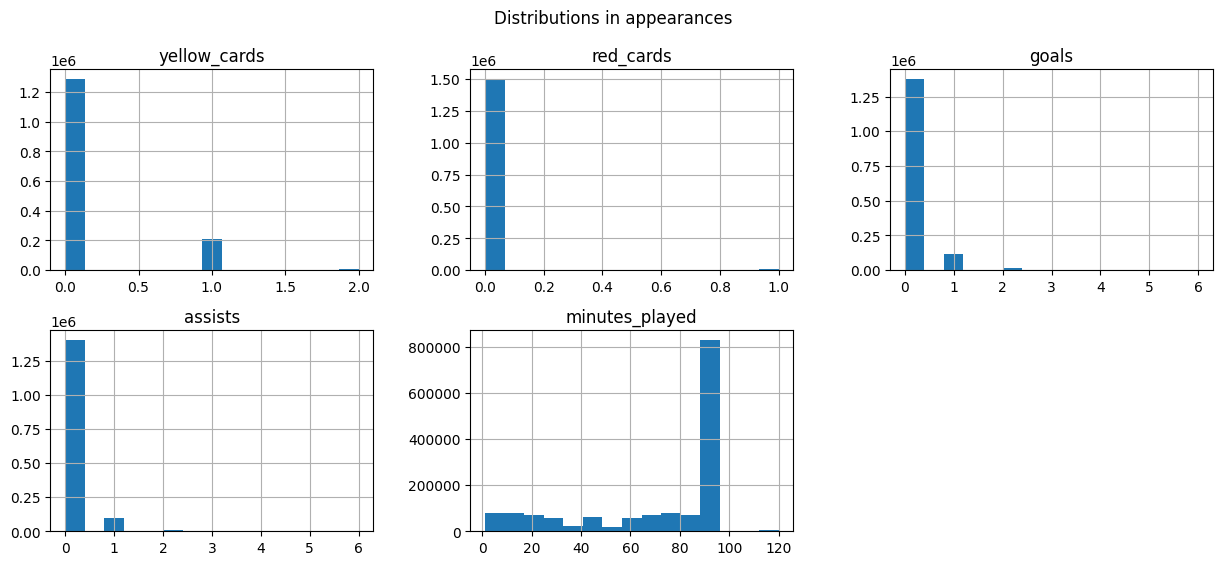

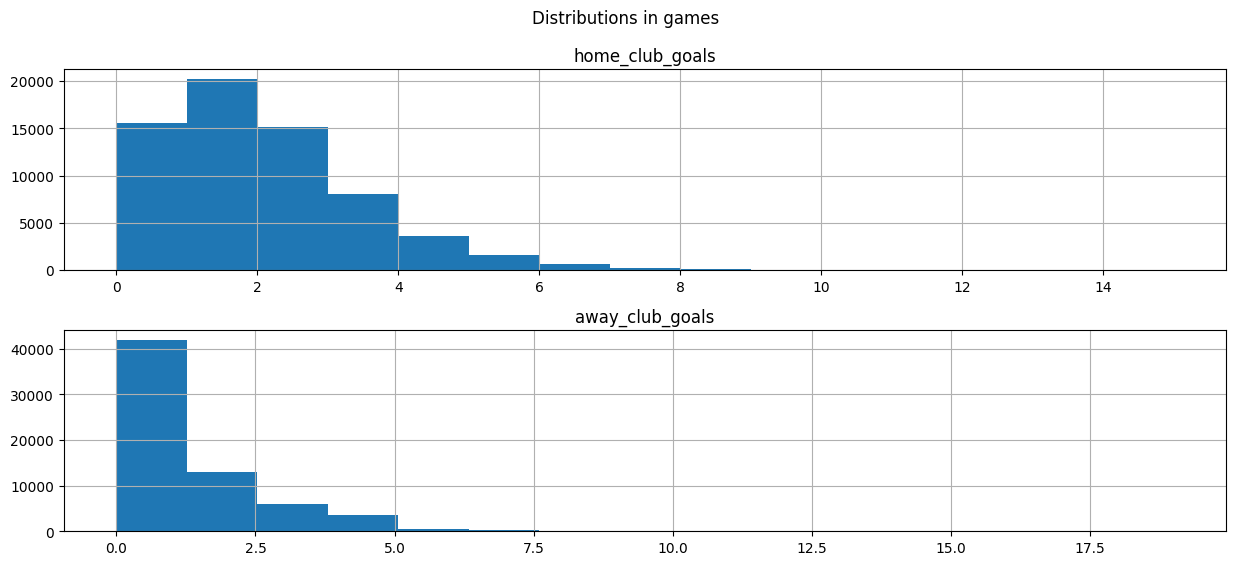

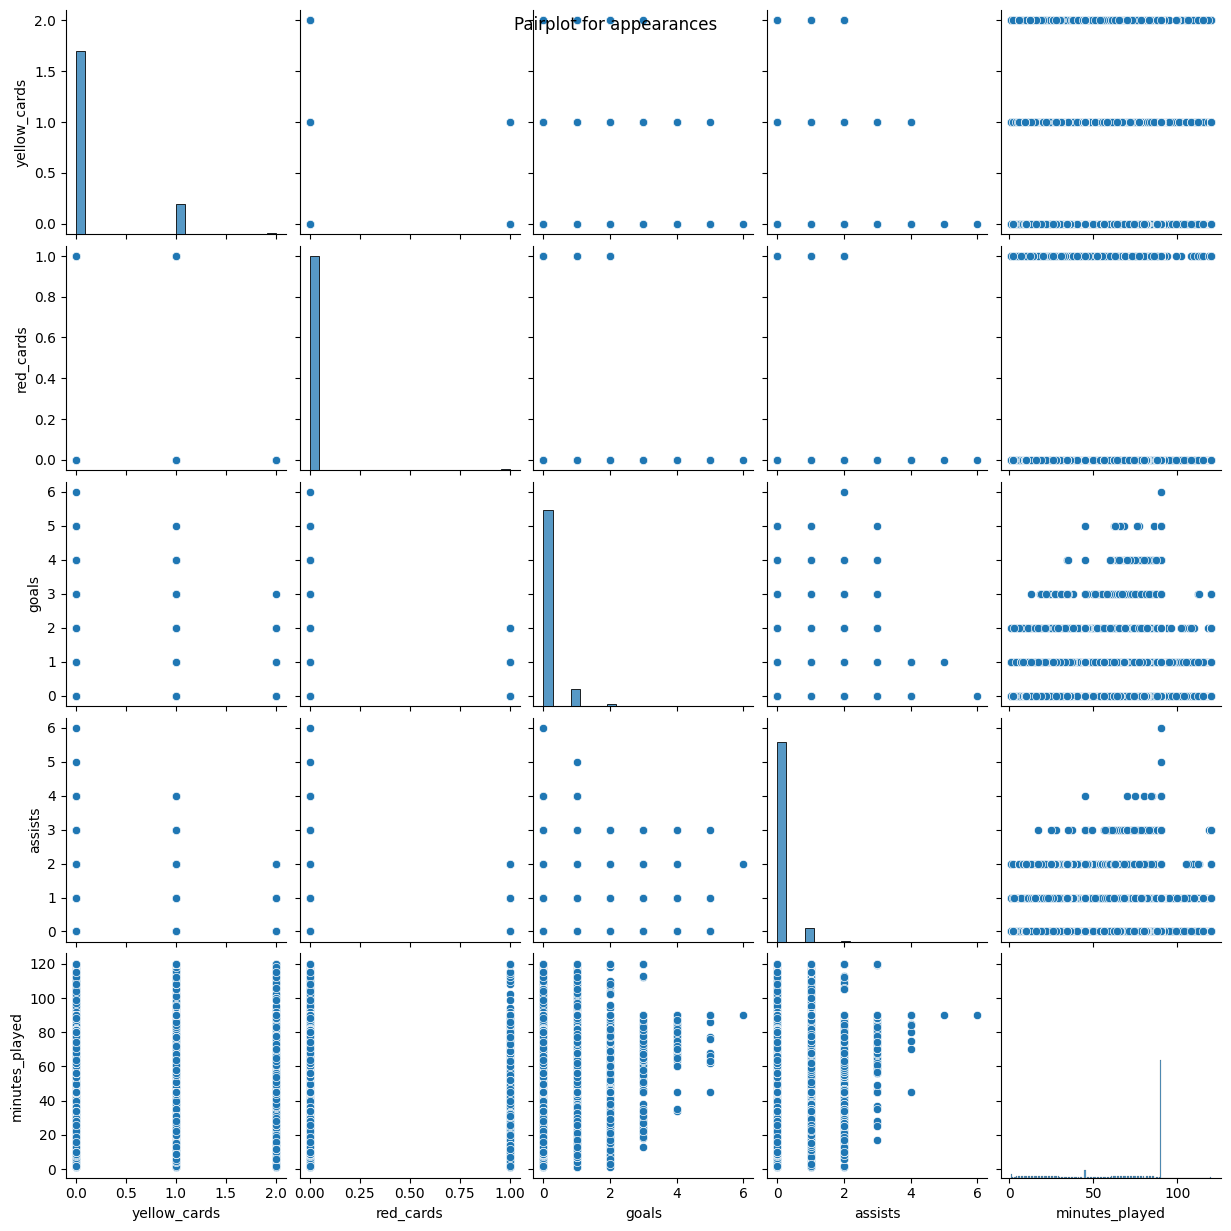

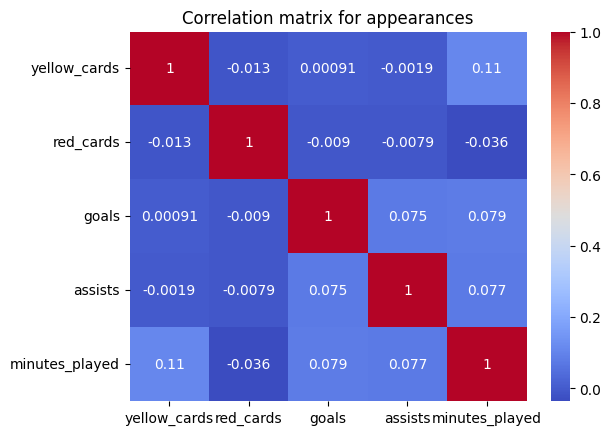

In [40]:
# Visualize distributions of key numerical features
def plot_distributions(df, name, cols):
    df[cols].hist(bins=15, figsize=(15, 6), layout=(2, len(cols)//2 + len(cols)%2))
    plt.suptitle(f"Distributions in {name}")
    plt.show()

plot_distributions(appearances, "appearances", ['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played'])
#plot_distributions(club_games, "club_games", ['own_goals', 'opponent_goals'])
plot_distributions(games, "games", ['home_club_goals', 'away_club_goals'])

# Scatter plots to examine relationships
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(appearances[['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played']])
plt.suptitle("Pairplot for appearances")
plt.show()

# Correlation matrix for numerical columns
corr = appearances[['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation matrix for appearances")
plt.show()


## Considerazioni
La maggior parte delle partecipazioni dei giocatori, come ci si aspetta, è caraterrizato da:
- Un numero abbastanza basso di cartellini gialli
- Ovviamente, un numero anche più basso di cartellini rossi
- Non molti goal e assist
Inoltre, la maggior parte dei giocatori gioca tutta la partita.

Come è lecito aspettarsi, il numero di goal quando si gioca in casa sembra essere maggiore rispetto alle partite fuori casa. In particolare, se si considerano solo le partite in casa, in media, la maggior aprte delle partite finisce con un goal effettuato dalla squadra che gioca in casa. Nel caso opposto, la maggior parte delle partite finisce con 0 goal segnati fuori casa.






# Appearances assesment

In [41]:
# Top players by goals, assists, and minutes played
top_goal_scorers = appearances.groupby('player_name')['goals'].sum().sort_values(ascending=False).head(10)
print("Top Goal Scorers:")
print(top_goal_scorers)

top_assist_providers = appearances.groupby('player_name')['assists'].sum().sort_values(ascending=False).head(10)
print("\nTop Assist Providers:")
print(top_assist_providers)

top_minutes_played = appearances.groupby('player_name')['minutes_played'].sum().sort_values(ascending=False).head(10)
print("\nTop Minutes Played:")
print(top_minutes_played)


Top Goal Scorers:
player_name
Robert Lewandowski           449
Lionel Messi                 443
Cristiano Ronaldo            432
Luis Suárez                  308
Harry Kane                   290
Pierre-Emerick Aubameyang    273
Ciro Immobile                250
Karim Benzema                249
Mohamed Salah                249
Romelu Lukaku                245
Name: goals, dtype: int64

Top Assist Providers:
player_name
Lionel Messi         219
Thomas Müller        202
Kevin De Bruyne      192
Dusan Tadic          182
Ángel Di María       161
Luis Suárez          150
Neymar               136
Hakim Ziyech         133
Christian Eriksen    129
Dimitri Payet        127
Name: assists, dtype: int64

Top Minutes Played:
player_name
Danilo                82526
Marcelo               75842
Paulinho              70945
Guilherme             59754
Fernando              51481
João Pedro            45242
Robert Lewandowski    45220
David de Gea          44129
Lionel Messi          43543
Koke            

<ipython-input-42-ee13a32399ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_assist_providers.values, y=top_assist_providers.index, palette='plasma')


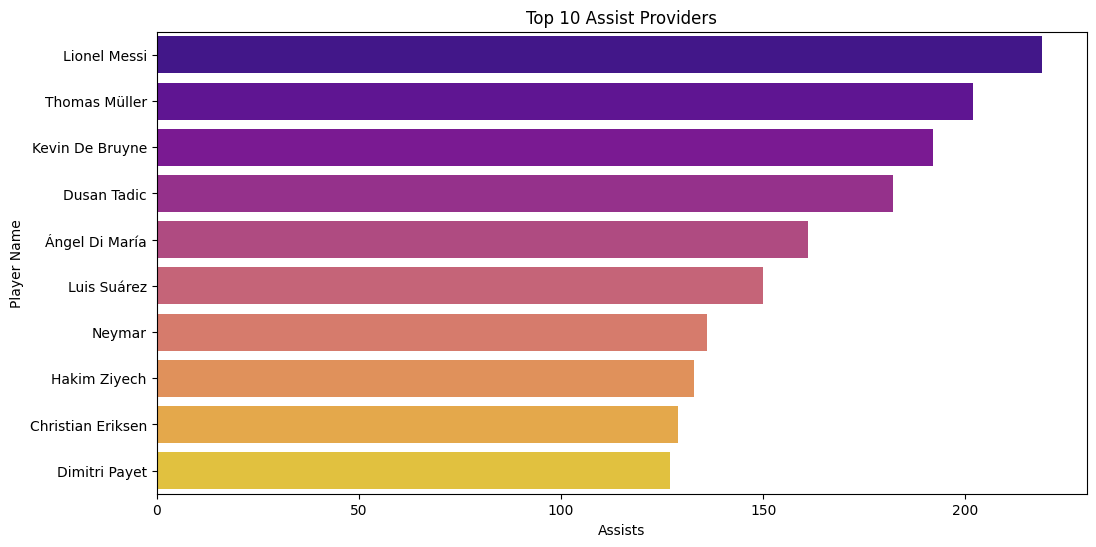

In [42]:
# Top Assist plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_assist_providers.values, y=top_assist_providers.index, palette='plasma')
plt.title('Top 10 Assist Providers')
plt.xlabel('Assists')
plt.ylabel('Player Name')
plt.show()


<ipython-input-43-0bb8cf5a96e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_goal_scorers.values, y=top_goal_scorers.index, palette='viridis')


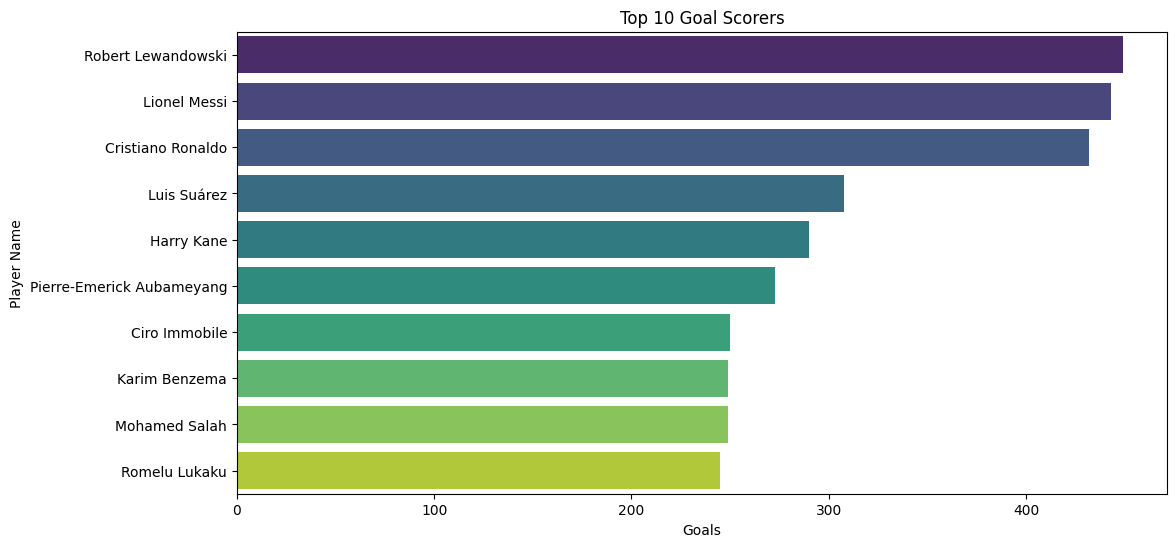

In [43]:
# Plot Top goals scorers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_goal_scorers.values, y=top_goal_scorers.index, palette='viridis')
plt.title('Top 10 Goal Scorers')
plt.xlabel('Goals')
plt.ylabel('Player Name')
plt.show()


<ipython-input-44-fa8191d6c9c2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_minutes_played.values, y=top_minutes_played.index, palette='cividis')


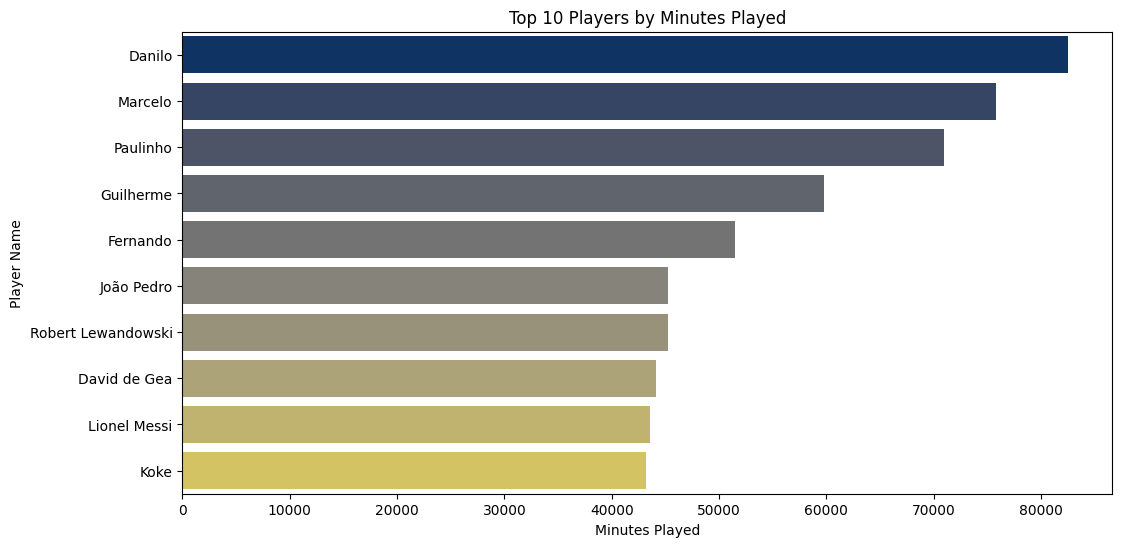

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_minutes_played.values, y=top_minutes_played.index, palette='cividis')
plt.title('Top 10 Players by Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Player Name')
plt.show()

<ipython-input-45-2eaf39027a28>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_yellow_cards, x='yellow_cards', y='player_name', palette='YlOrBr')


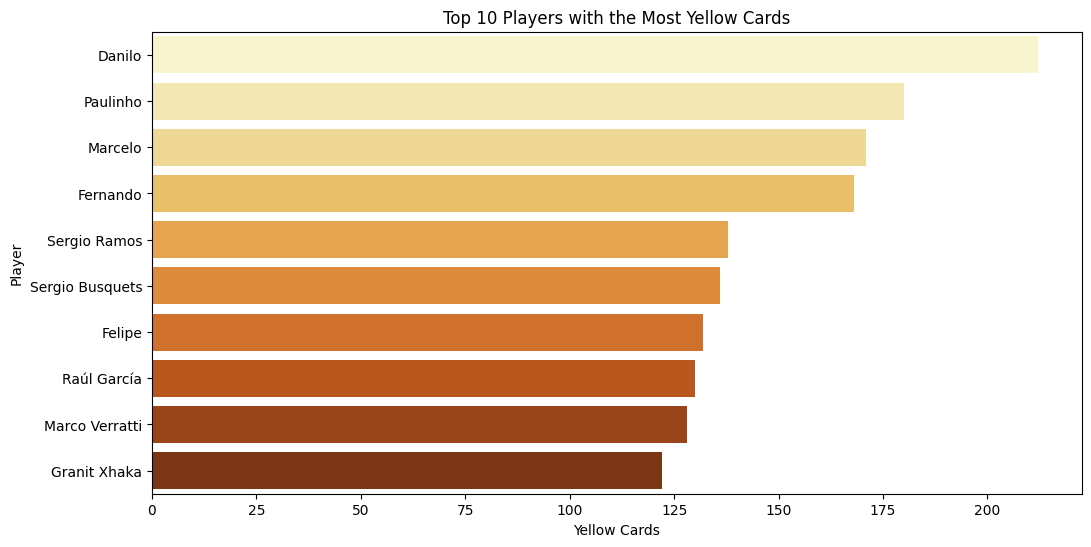

<ipython-input-45-2eaf39027a28>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_red_cards, x='red_cards', y='player_name', palette='Reds')


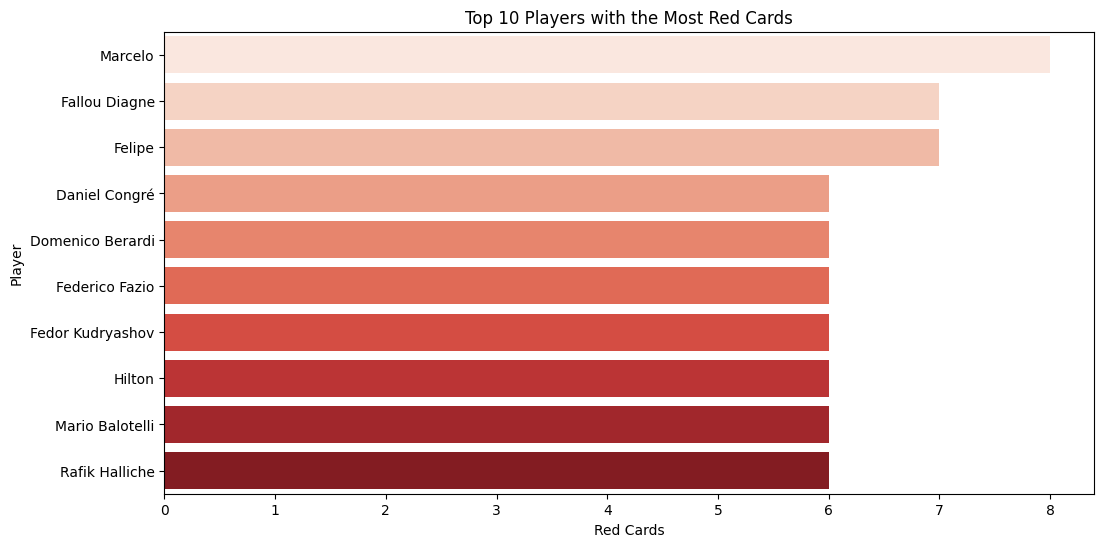

In [45]:
# Aggregate yellow and red cards by player
cards = appearances.groupby('player_name')[['yellow_cards', 'red_cards']].sum().reset_index()

# Top 10 players with the most yellow cards
top_yellow_cards = cards.nlargest(10, 'yellow_cards')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_yellow_cards, x='yellow_cards', y='player_name', palette='YlOrBr')
plt.title('Top 10 Players with the Most Yellow Cards')
plt.xlabel('Yellow Cards')
plt.ylabel('Player')
plt.show()

# Top 10 players with the most red cards
top_red_cards = cards.nlargest(10, 'red_cards')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_red_cards, x='red_cards', y='player_name', palette='Reds')
plt.title('Top 10 Players with the Most Red Cards')
plt.xlabel('Red Cards')
plt.ylabel('Player')
plt.show()


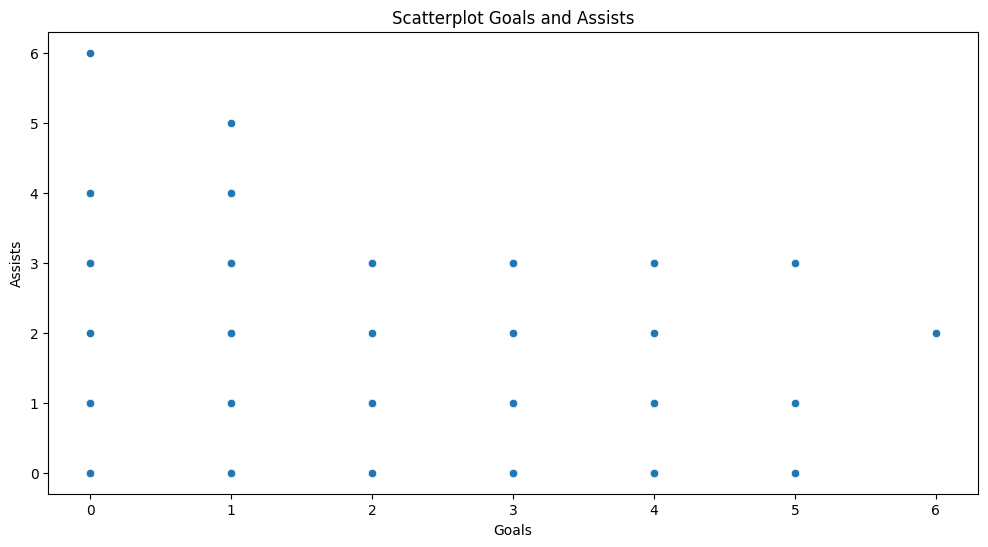

In [46]:
# Plot correlation between goals and assists
plt.figure(figsize=(12, 6))
sns.scatterplot(data=appearances, x='goals', y='assists')
plt.title('Scatterplot Goals and Assists')
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.show()


## Appearances e altre tabelle

<ipython-input-47-2f45ccea01ce>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=club_appearances.nlargest(10, 'appearances'), x='appearances', y='name', palette='Blues')


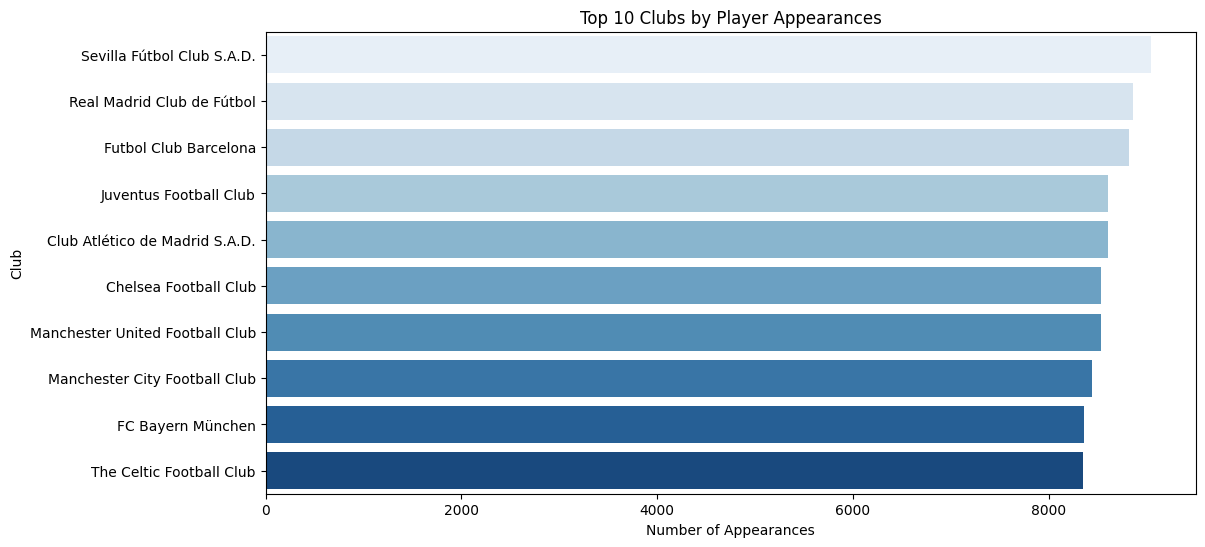

In [47]:
# Count appearances by club
club_appearances = appearances['player_club_id'].value_counts().reset_index()
club_appearances.columns = ['club_id', 'appearances']

# Merge with clubs data
club_appearances = pd.merge(club_appearances, clubs, on='club_id')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=club_appearances.nlargest(10, 'appearances'), x='appearances', y='name', palette='Blues')
plt.title('Top 10 Clubs by Player Appearances')
plt.xlabel('Number of Appearances')
plt.ylabel('Club')
plt.show()


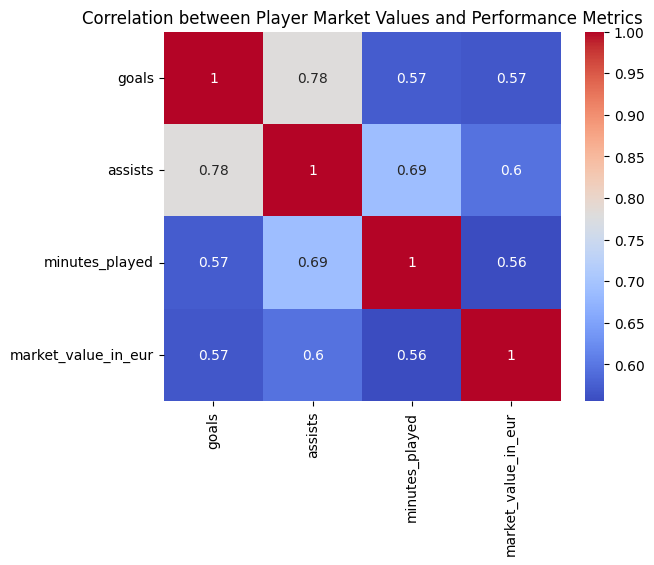

In [48]:
# Correlation between player market values and performance metrics
player_performance = appearances.groupby('player_id').agg({'goals': 'sum', 'assists': 'sum', 'minutes_played': 'sum'}).reset_index()
player_values = player_valuations.groupby('player_id')['market_value_in_eur'].max().reset_index()
merged_data = player_performance.merge(player_values, on='player_id', how='left')

# Correlation matrix
corr_matrix = merged_data[['goals', 'assists', 'minutes_played', 'market_value_in_eur']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Player Market Values and Performance Metrics')
plt.show()


### Considerazioni
Risulta posibile notare dalla matrice di correlazione come molte osservazioni intuitive siano supportate dai dati:
- Giocatori che hanno un valore di mercato maggiore fanno più goal
- Maggiore il tempo giocato, maggiore il numero di goal (e di assist)
- Probabilmente grazie al ruolo e quindi la posizione in campo, goal e assist sono positivamente correlati


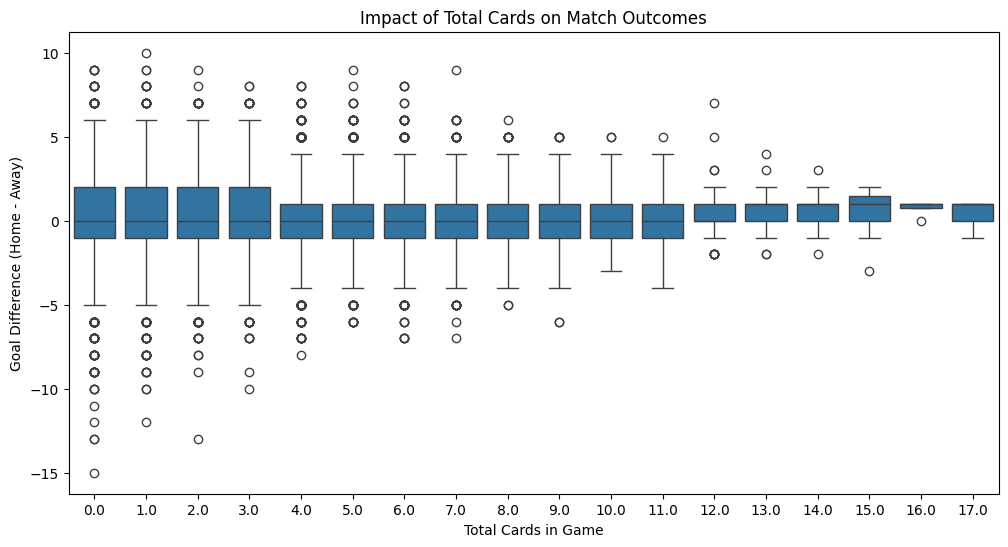

In [49]:
# Adding a column for the total number of cards in each game
appearances['total_cards'] = appearances['yellow_cards'] + appearances['red_cards']
game_cards = appearances.groupby('game_id')['total_cards'].sum().reset_index()
games_with_cards = games.merge(game_cards, on='game_id', how='left')

plt.figure(figsize=(12, 6))
sns.boxplot(x=games_with_cards['total_cards'], y=games_with_cards['home_club_goals'] - games_with_cards['away_club_goals'])
plt.title('Impact of Total Cards on Match Outcomes')
plt.xlabel('Total Cards in Game')
plt.ylabel('Goal Difference (Home - Away)')
plt.show()

### Considerazioni
La differenza reti tra chi gioca in casa e chi fuoricasa, come già osservato, è positiva a favore di chi gioca in casa. Tuttavia è possibile notare che all'aumentare del numero di cartellini dati in partita, risulta che tale differenza si riduce. Alcune possibili giustificazioni intuitive potrebbero essero:
- I cartellini aumentano poichè la partita è in uno stato di stalo
- Il numero di cartellini è maggiore quando le partite durano di più (es. tempi summplementari), giustificando quindi una minore differenza reti


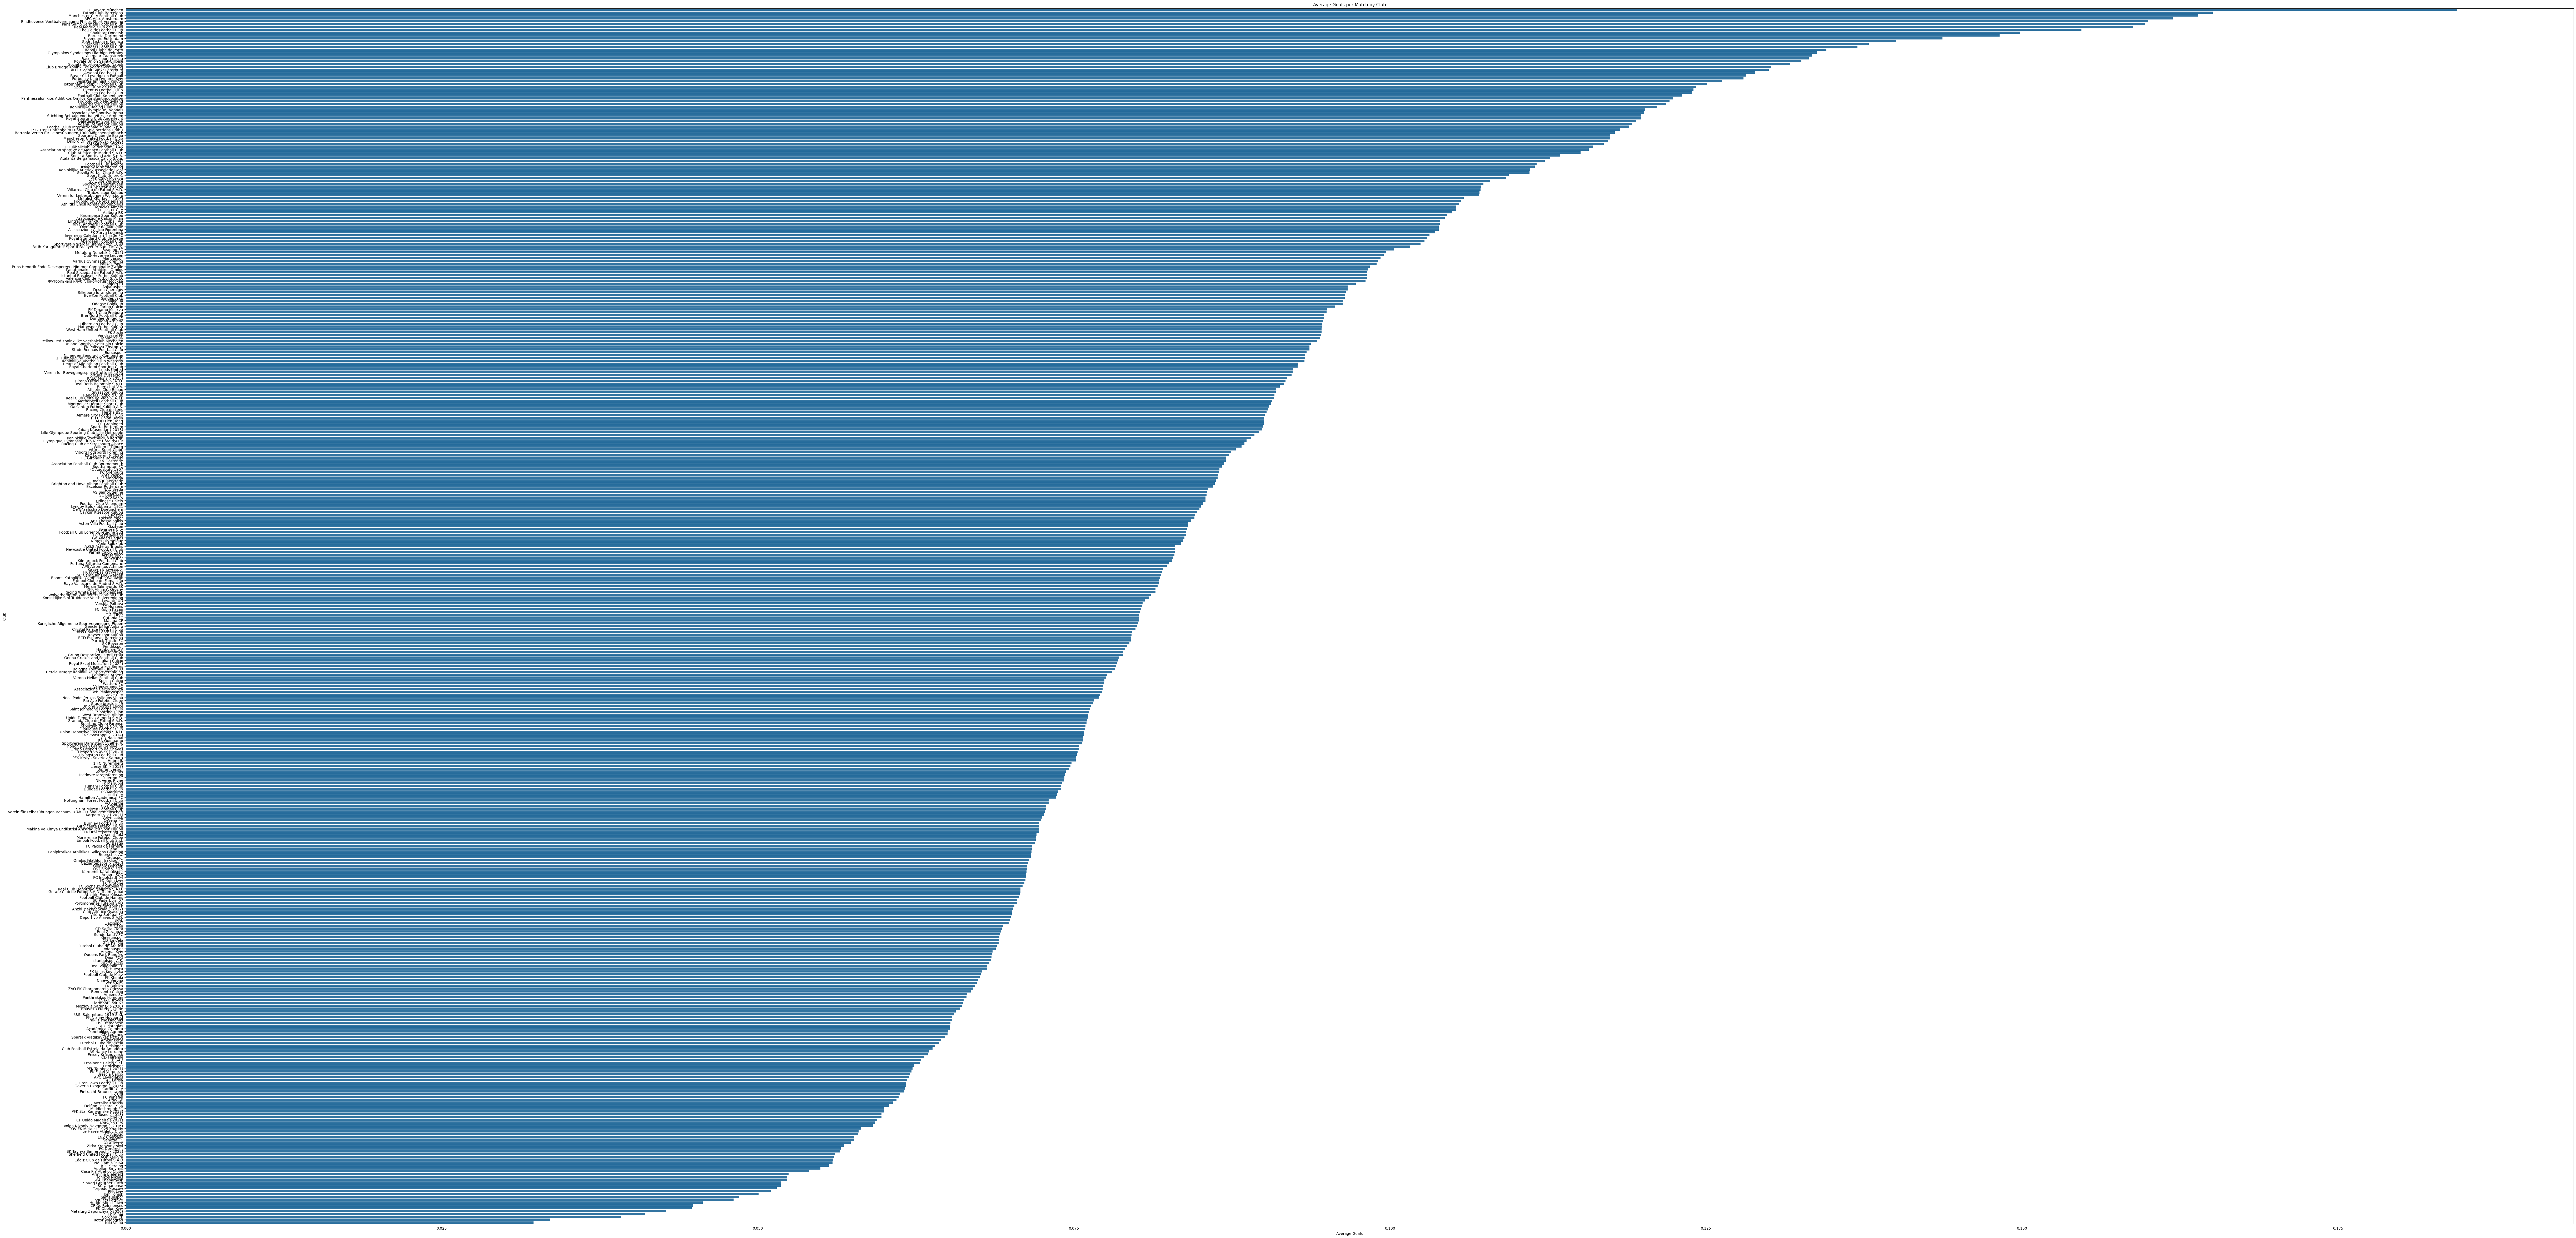

In [50]:
# Calculate average goals per match for each club (aprire in nuova scheda per visualizzazione)
avg_goals_per_match = appearances.groupby('player_club_id')['goals'].mean().reset_index()
avg_goals_per_match = avg_goals_per_match.merge(clubs, left_on='player_club_id', right_on='club_id')

# Plot
plt.figure(figsize=(120, 60))
sns.barplot(data=avg_goals_per_match.sort_values('goals', ascending=False), x='goals', y='name')
plt.title('Average Goals per Match by Club')
plt.xlabel('Average Goals')
plt.ylabel('Club')
plt.show()

# Players assessment

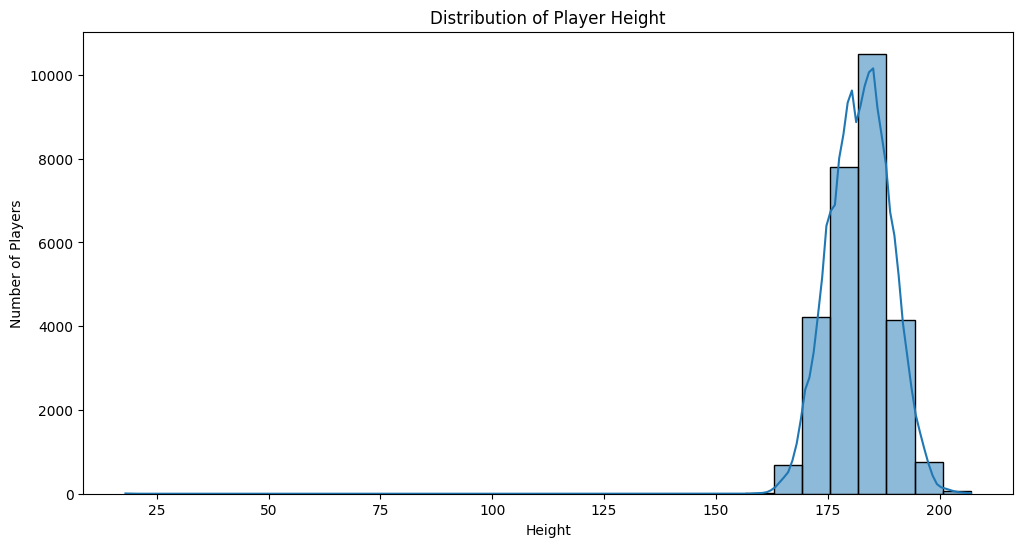

In [51]:
### Player heights
player_heights = players[['player_id', 'name', 'height_in_cm']]

plt.figure(figsize=(12, 6))
sns.histplot(players['height_in_cm'], bins=30, kde=True)
plt.title('Distribution of Player Height')
plt.xlabel('Height')
plt.ylabel('Number of Players')
plt.show()

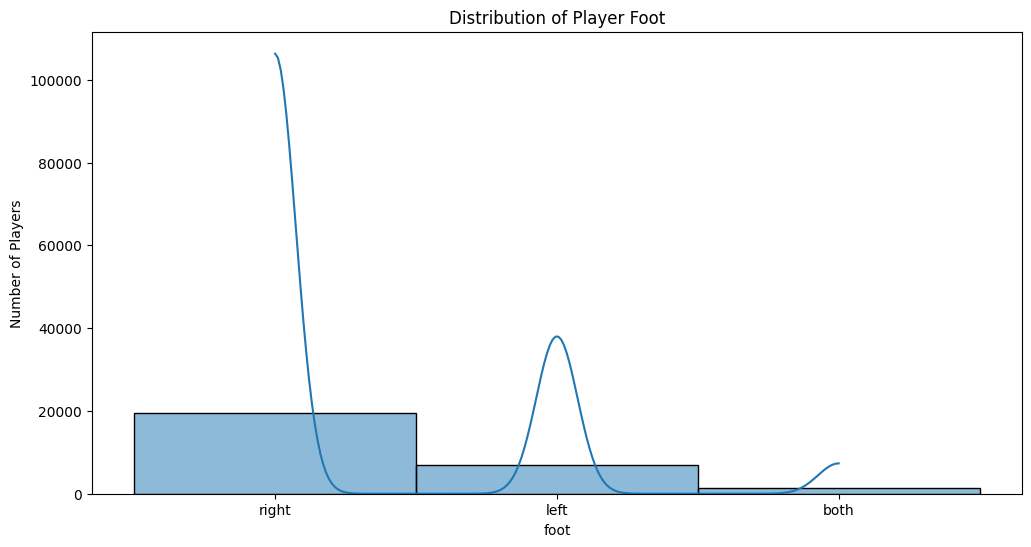

In [52]:
### Player foot
plt.figure(figsize=(12, 6))
sns.histplot(players['foot'], bins=30, kde=True)
plt.title('Distribution of Player Foot')
plt.xlabel('foot')
plt.ylabel('Number of Players')
plt.show()

<ipython-input-53-e8bb0e9434b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players['date_of_birth'] = players['date_of_birth'].astype(str)
<ipython-input-53-e8bb0e9434b5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players['age'] = players['date_of_birth'].apply(lambda x: 2024 - int(x.split('-')[0]))


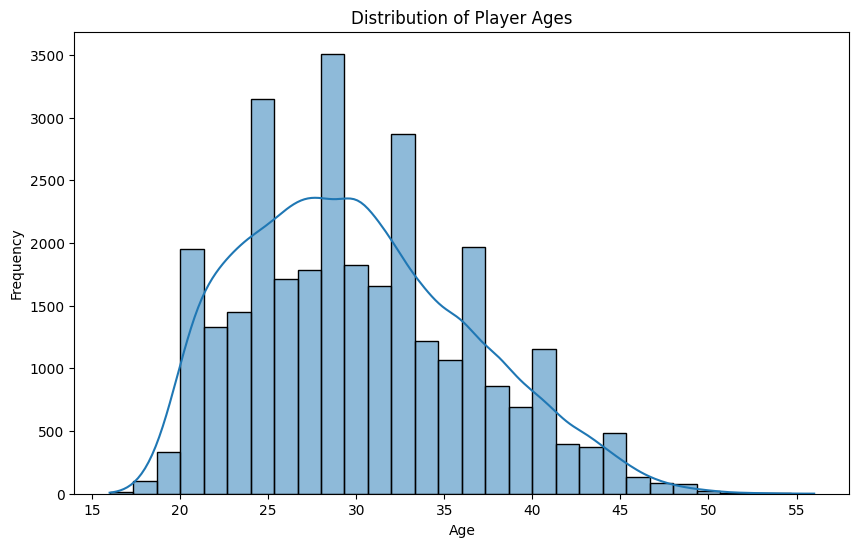

In [53]:
### Players Age
# Ensure date_of_birth is a string and drop NaN values
players = players.dropna(subset=['date_of_birth'])
players['date_of_birth'] = players['date_of_birth'].astype(str)

# Calculate age of players
players['age'] = players['date_of_birth'].apply(lambda x: 2024 - int(x.split('-')[0]))

# Plot distribution of player ages
plt.figure(figsize=(10, 6))
sns.histplot(players['age'], bins=30, kde=True)
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# PlayerValuations

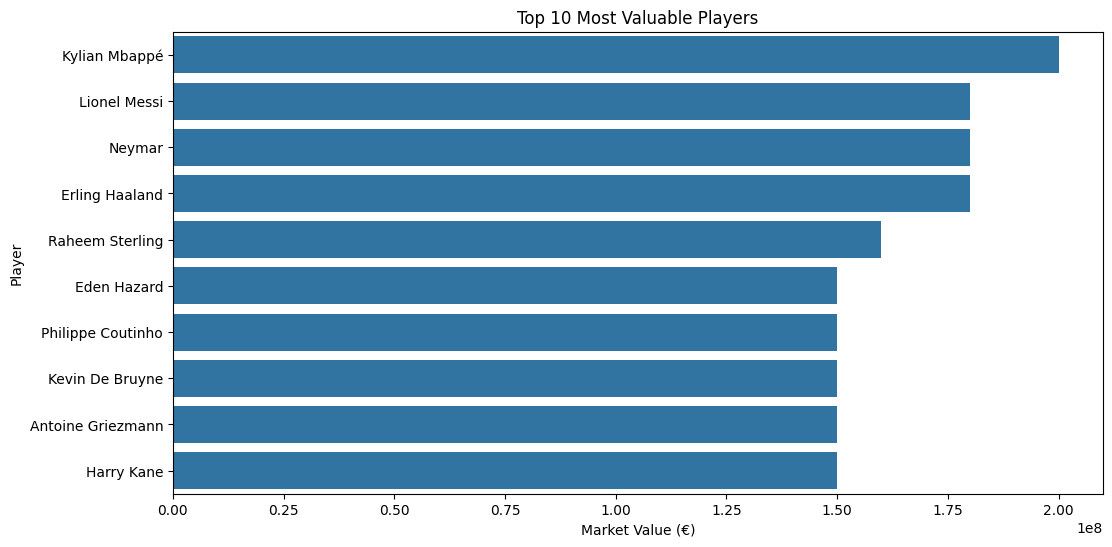

In [54]:
# Ensure 'market_value_in_eur' column is numeric
player_valuations['market_value_in_eur'] = pd.to_numeric(player_valuations['market_value_in_eur'], errors='coerce')

# Get the highest market value for each player
max_market_values = player_valuations.groupby('player_id')['market_value_in_eur'].max().reset_index()

# Merge with players data
top_players = pd.merge(max_market_values, players, on='player_id')

#print(top_players.columns)
#print(top_players.head())

# Get the top 10 most valuable players
top_10_players = top_players.nlargest(10, 'highest_market_value_in_eur')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_players, x='highest_market_value_in_eur', y='name')
plt.title('Top 10 Most Valuable Players')
plt.xlabel('Market Value (€)')
plt.ylabel('Player')
plt.show()

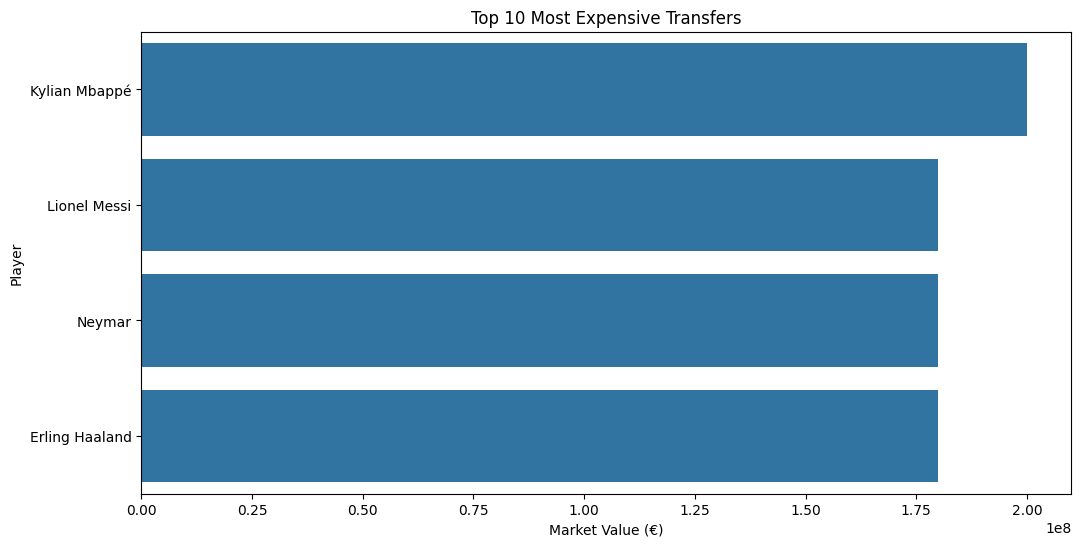

In [55]:
### Top 10 most expensive transfers
# Merge valuations with players to get player information
transfer_data = pd.merge(player_valuations, players[['player_id', 'name', 'current_club_id']], on='player_id')

# Get the highest market value for each player
max_market_values_transfers = transfer_data.groupby('player_id')['market_value_in_eur'].max().reset_index()

# Merge back with transfer data to get full info
max_market_values_transfers = max_market_values_transfers.merge(transfer_data, on=['player_id', 'market_value_in_eur'])

# Get top 10 most expensive transfers
top_10_transfers = max_market_values_transfers.nlargest(10, 'market_value_in_eur')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_transfers, x='market_value_in_eur', y='name')
plt.title('Top 10 Most Expensive Transfers')
plt.xlabel('Market Value (€)')
plt.ylabel('Player')
plt.show()

## PlayerValuations e altre tabelle

<ipython-input-56-8729ef224ea0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_club_market_value.nlargest(10, 'market_value_in_eur'), x='market_value_in_eur', y='name', palette='Greens')


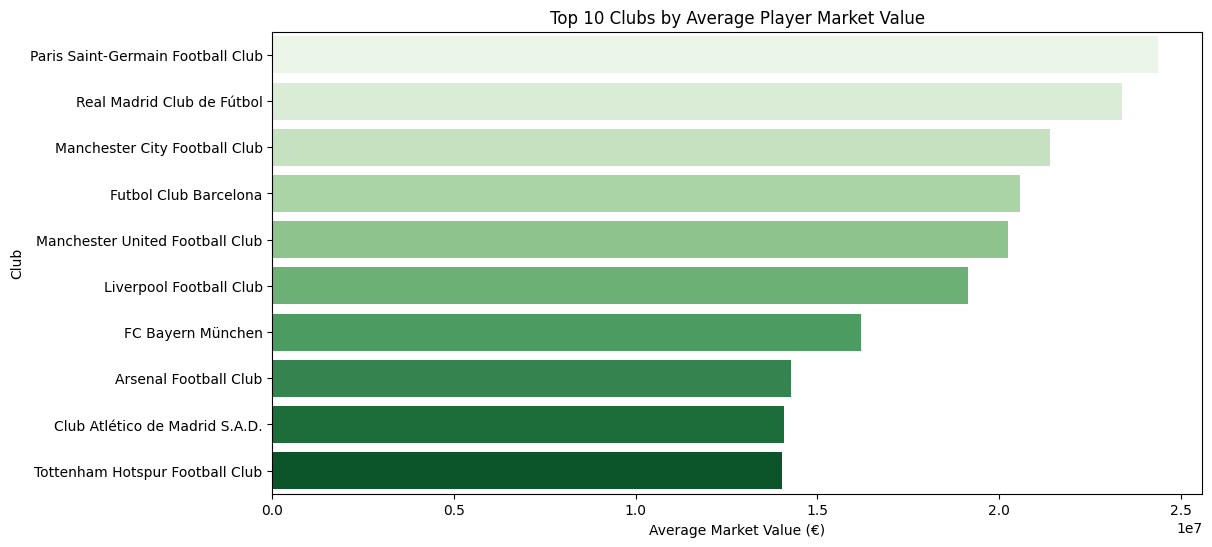

In [56]:
### Top10 clubs by market valuation
# Calculate average market value by club
avg_club_market_value = player_valuations.groupby('current_club_id')['market_value_in_eur'].mean().reset_index()

# Merge with clubs data
avg_club_market_value = pd.merge(avg_club_market_value, clubs, left_on='current_club_id', right_on='club_id')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_club_market_value.nlargest(10, 'market_value_in_eur'), x='market_value_in_eur', y='name', palette='Greens')
plt.title('Top 10 Clubs by Average Player Market Value')
plt.xlabel('Average Market Value (€)')
plt.ylabel('Club')
plt.show()

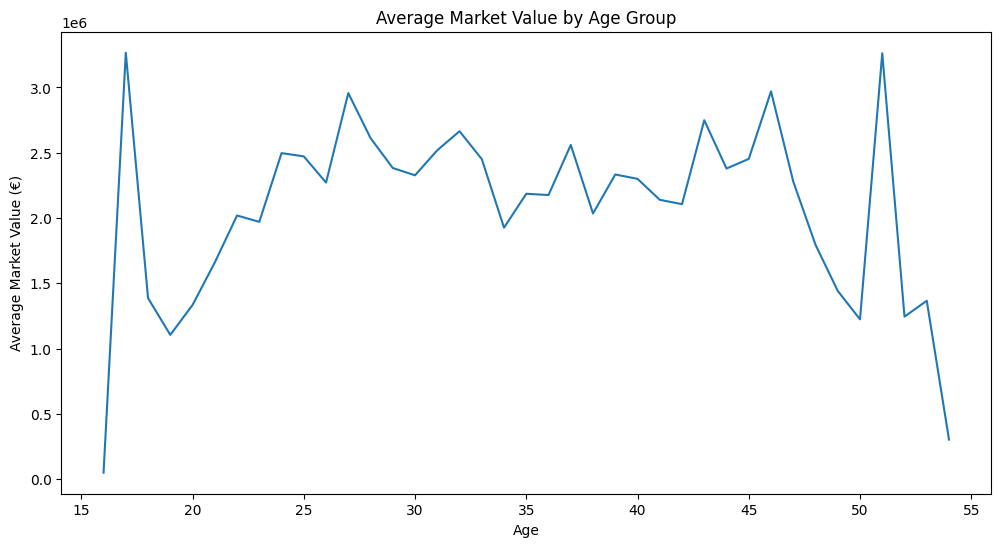

In [57]:
### Player age vs market value
# Ensure date_of_birth is a string and drop NaN values
players = players.dropna(subset=['date_of_birth'])
players['date_of_birth'] = players['date_of_birth'].astype(str)

# Calculate age of players
players['age'] = players['date_of_birth'].apply(lambda x: 2024 - int(x.split('-')[0]))

# Merge valuations with players
player_valuations_with_age = pd.merge(player_valuations, players[['player_id', 'age']], on='player_id')

# Ensure 'market_value_in_eur' column is numeric
player_valuations_with_age['market_value_in_eur'] = pd.to_numeric(player_valuations_with_age['market_value_in_eur'], errors='coerce')

# Calculate average market value by age group
avg_market_value_by_age = player_valuations_with_age.groupby('age')['market_value_in_eur'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_market_value_by_age, x='age', y='market_value_in_eur')
plt.title('Average Market Value by Age Group')
plt.xlabel('Age')
plt.ylabel('Average Market Value (€)')
plt.show()

# Games

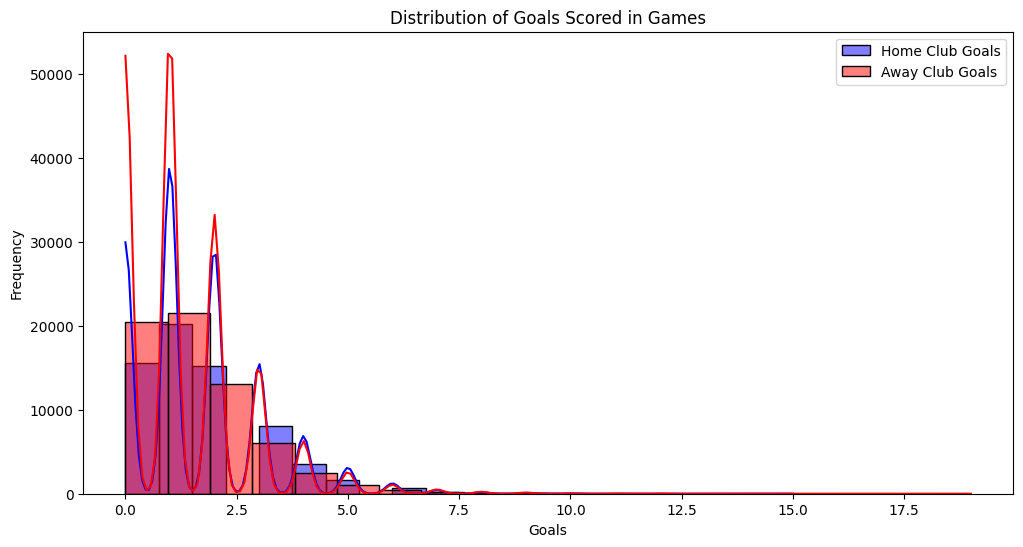

In [58]:
# Plot distribution of #goals scored in games
plt.figure(figsize=(12, 6))
sns.histplot(games['home_club_goals'], bins=20, kde=True, color='blue', label='Home Club Goals')
sns.histplot(games['away_club_goals'], bins=20, kde=True, color='red', label='Away Club Goals')
plt.title('Distribution of Goals Scored in Games')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Game Events

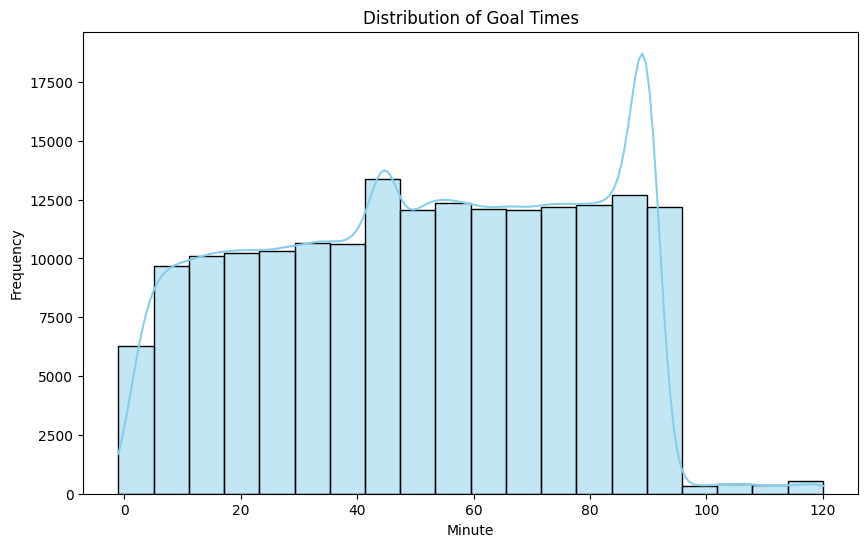

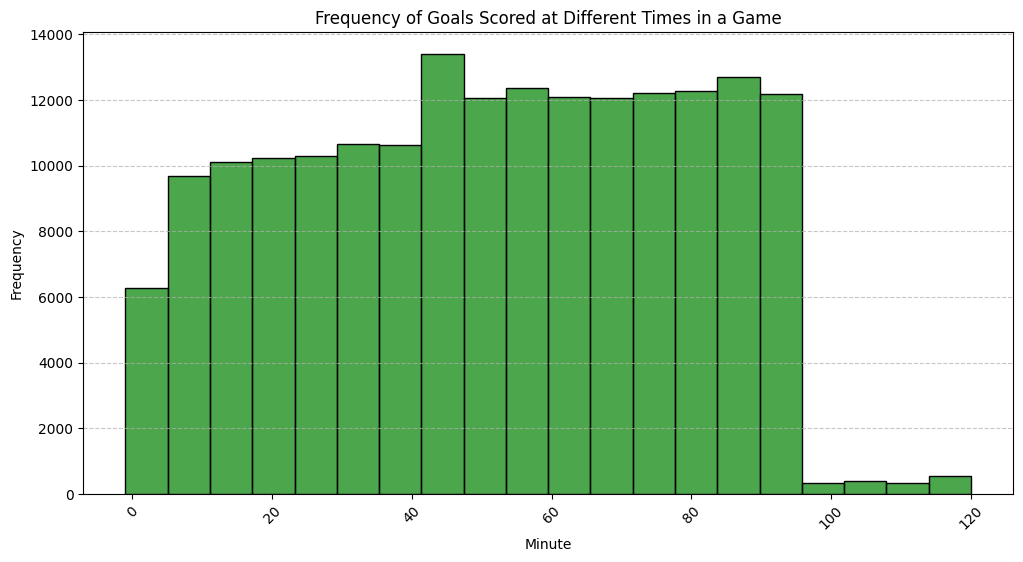

In [59]:
### Goals distribution
# Filter game_events DataFrame to include only rows where goals are scored
goal_events = game_events[game_events['type'] == 'Goals']

# Plot the distribution of when a goal is kicked
plt.figure(figsize=(10, 6))
sns.histplot(goal_events['minute'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Goal Times')
plt.xlabel('Minute')
plt.ylabel('Frequency')
plt.show()

# Calculate correlation between the time in a game and when a goal is made
correlation = goal_events['minute'].corr(game_events['minute'])

# Create a bar plot to show the frequency of goals scored at different times in a game
plt.figure(figsize=(12, 6))
sns.histplot(goal_events['minute'], color='green', bins=20, alpha=0.7)
plt.title('Frequency of Goals Scored at Different Times in a Game')
plt.xlabel('Minute')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

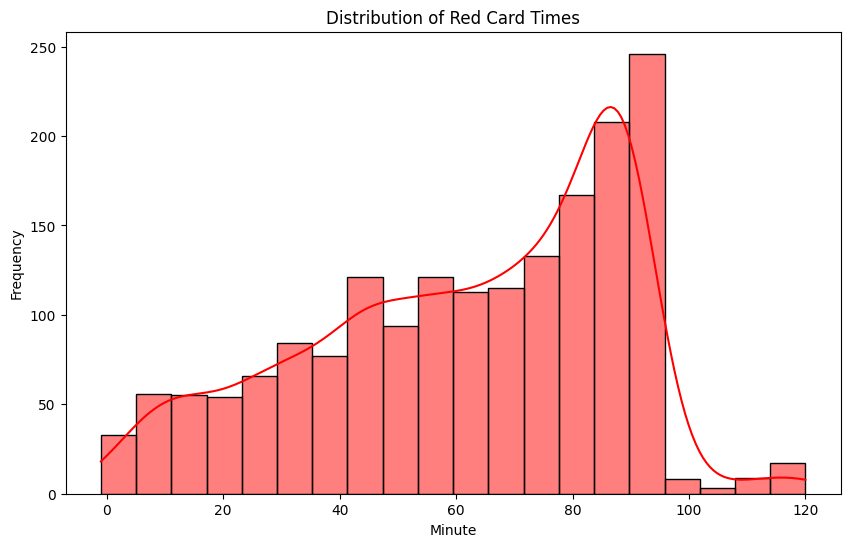

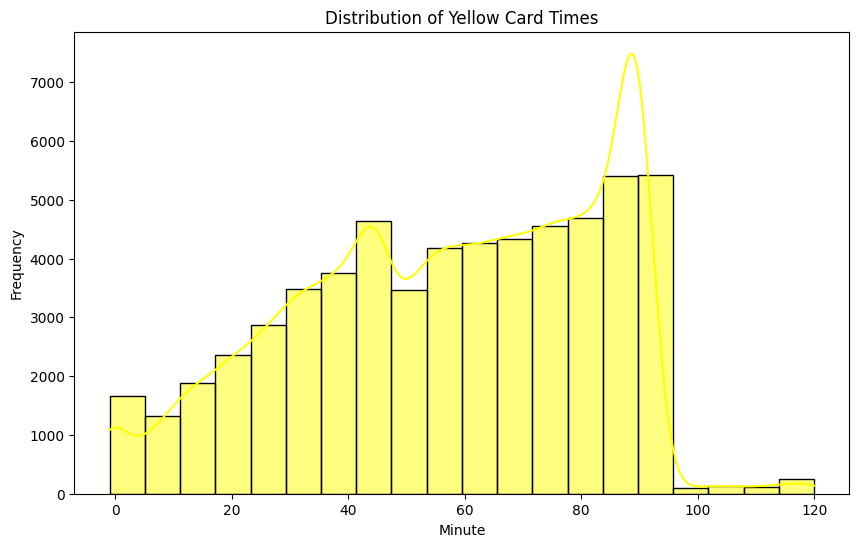

In [60]:
###  Cards distribution
# AS first, filter game_events DataFrame to include only rows where there arered cards
red_card_events = game_events[game_events['type'] == 'Cards']
red_card_events = red_card_events[red_card_events['description'].str.contains('Red card')]

#Same for yellow card
yellow_card_events = game_events[game_events['type'] == 'Cards']
yellow_card_events = yellow_card_events[yellow_card_events['description'].str.contains('Yellow card')]

# Plot the distribution of red card times
plt.figure(figsize=(10, 6))
sns.histplot(red_card_events['minute'], kde=True, color='red', bins=20)
plt.title('Distribution of Red Card Times')
plt.xlabel('Minute')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of yellow card times
plt.figure(figsize=(10, 6))
sns.histplot(yellow_card_events['minute'], kde=True, color='yellow', bins=20)
plt.title('Distribution of Yellow Card Times')
plt.xlabel('Minute')
plt.ylabel('Frequency')
plt.show()

## Considerazioni
I goal nei primi minuti di gioco sono più rari, mentre sono più frequenti al termine del primo tempo / inizio del secondo tempo. Quelli dei supplementari sembrano pochi, ma ciò è dovuto al fatto che il grafico non tiene in considerazione il fatto che solo poche partite arrivano ai supplementari.

Sia i cartellini gialli che rossi crescono in frequenza all'aumentare del tempo di gioco.
Senza sorpresa è facile notare che i cartellini rossi sono lievemente shiftati a destra (in particolare per i primi minuti di gioco). Ciò è giustificabile in quanto più raramente viene estratto direttamente il cartellino rosso dall'arbitro.
Inoltre, si ha un picco di cartellini vicino alla fine del primo e secondo tempo.
Infine, durante i tempi supplementari la frequenza è minore, questo è probabilmente giustificato dal fatto che raramente si arriva ai supplementari. Si potrebbe verificare la frequenza relativa normalizzata per validatare tale ipotesi.

## GameEvents e altre tabelle

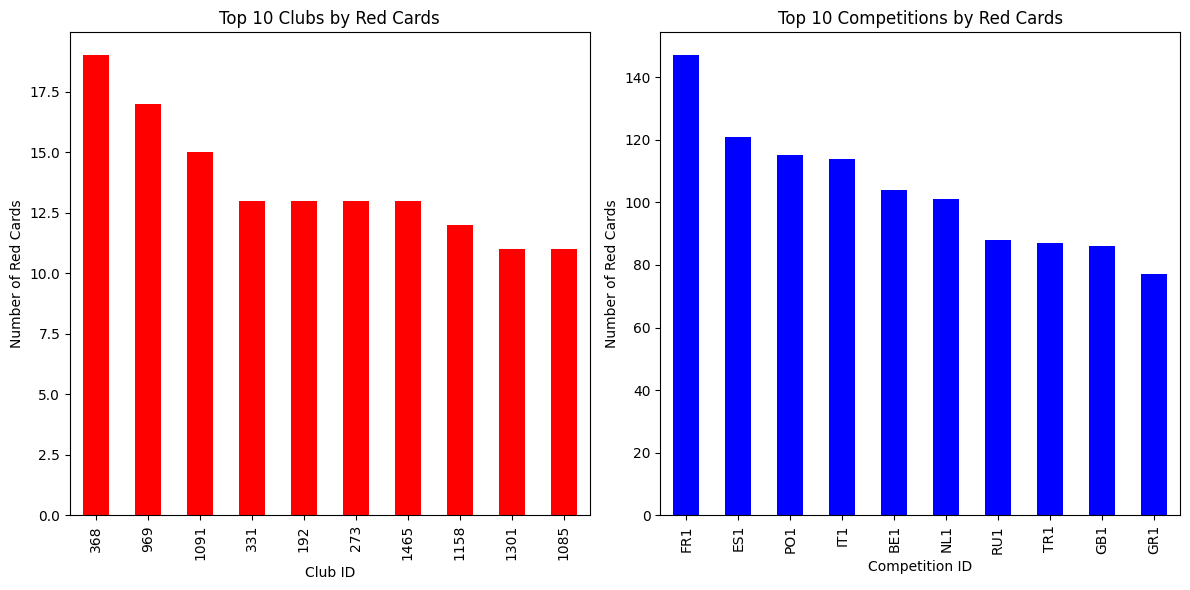

In [61]:
#### Clubs and Competitios with most red cards
game_events_with_competition = pd.merge(game_events, games[['game_id', 'competition_id']], on='game_id', how='left')

# Drop rows with missing values in 'club_id' column and convert description to string
game_events_filtered = game_events_with_competition.dropna(subset=['club_id', 'competition_id'])

game_events_filtered['description'] = game_events_filtered['description'].astype(str)

# Filter the DataFrame to includeexclusively events related to red cards
red_cards_events = game_events_filtered[game_events_filtered['description'].str.contains('Red card')]

# Group by club_id and count the number of red cards for each club
red_cards_by_club = red_cards_events.groupby('club_id').size()

# Group by the competition_id and count the number of red cards for each competition
red_cards_by_competition = red_cards_events.groupby('competition_id').size()

# Sort the results and select the top 10
top_10_clubs_by_red_cards = red_cards_by_club.sort_values(ascending=False).head(10)
top_10_competitions_by_red_cards = red_cards_by_competition.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))

# Create chart for top 10 clubs by red cards
plt.subplot(1, 2, 1)
top_10_clubs_by_red_cards.plot(kind='bar', color='red')
plt.title('Top 10 Clubs by Red Cards')
plt.xlabel('Club ID')
plt.ylabel('Number of Red Cards')

# Create chart for top 10 competitions by red cards
plt.subplot(1, 2, 2)
top_10_competitions_by_red_cards.plot(kind='bar', color='blue')
plt.title('Top 10 Competitions by Red Cards')
plt.xlabel('Competition ID')
plt.ylabel('Number of Red Cards')

plt.tight_layout()
plt.show()

club_id        0
red_cards      0
club_name    236
dtype: int64
     club_id  red_cards                                          club_name
107      368         19                         Sevilla Fútbol Club S.A.D.
200      969         17                     Montpellier Hérault Sport Club
233     1091         15  Panthessalonikios Athlitikos Omilos Konstantin...
94       331         13                              Club Atlético Osasuna
66       192         13                                   Roda JC Kerkrade
83       273         13                        Stade Rennais Football Club
270     1465         13                     Grupo Desportivo Estoril Praia
245     1158         12                 Football Club Lorient-Bretagne Sud
260     1301         11                                        CS Marítimo
231     1085         11                                 Vitória Setúbal FC


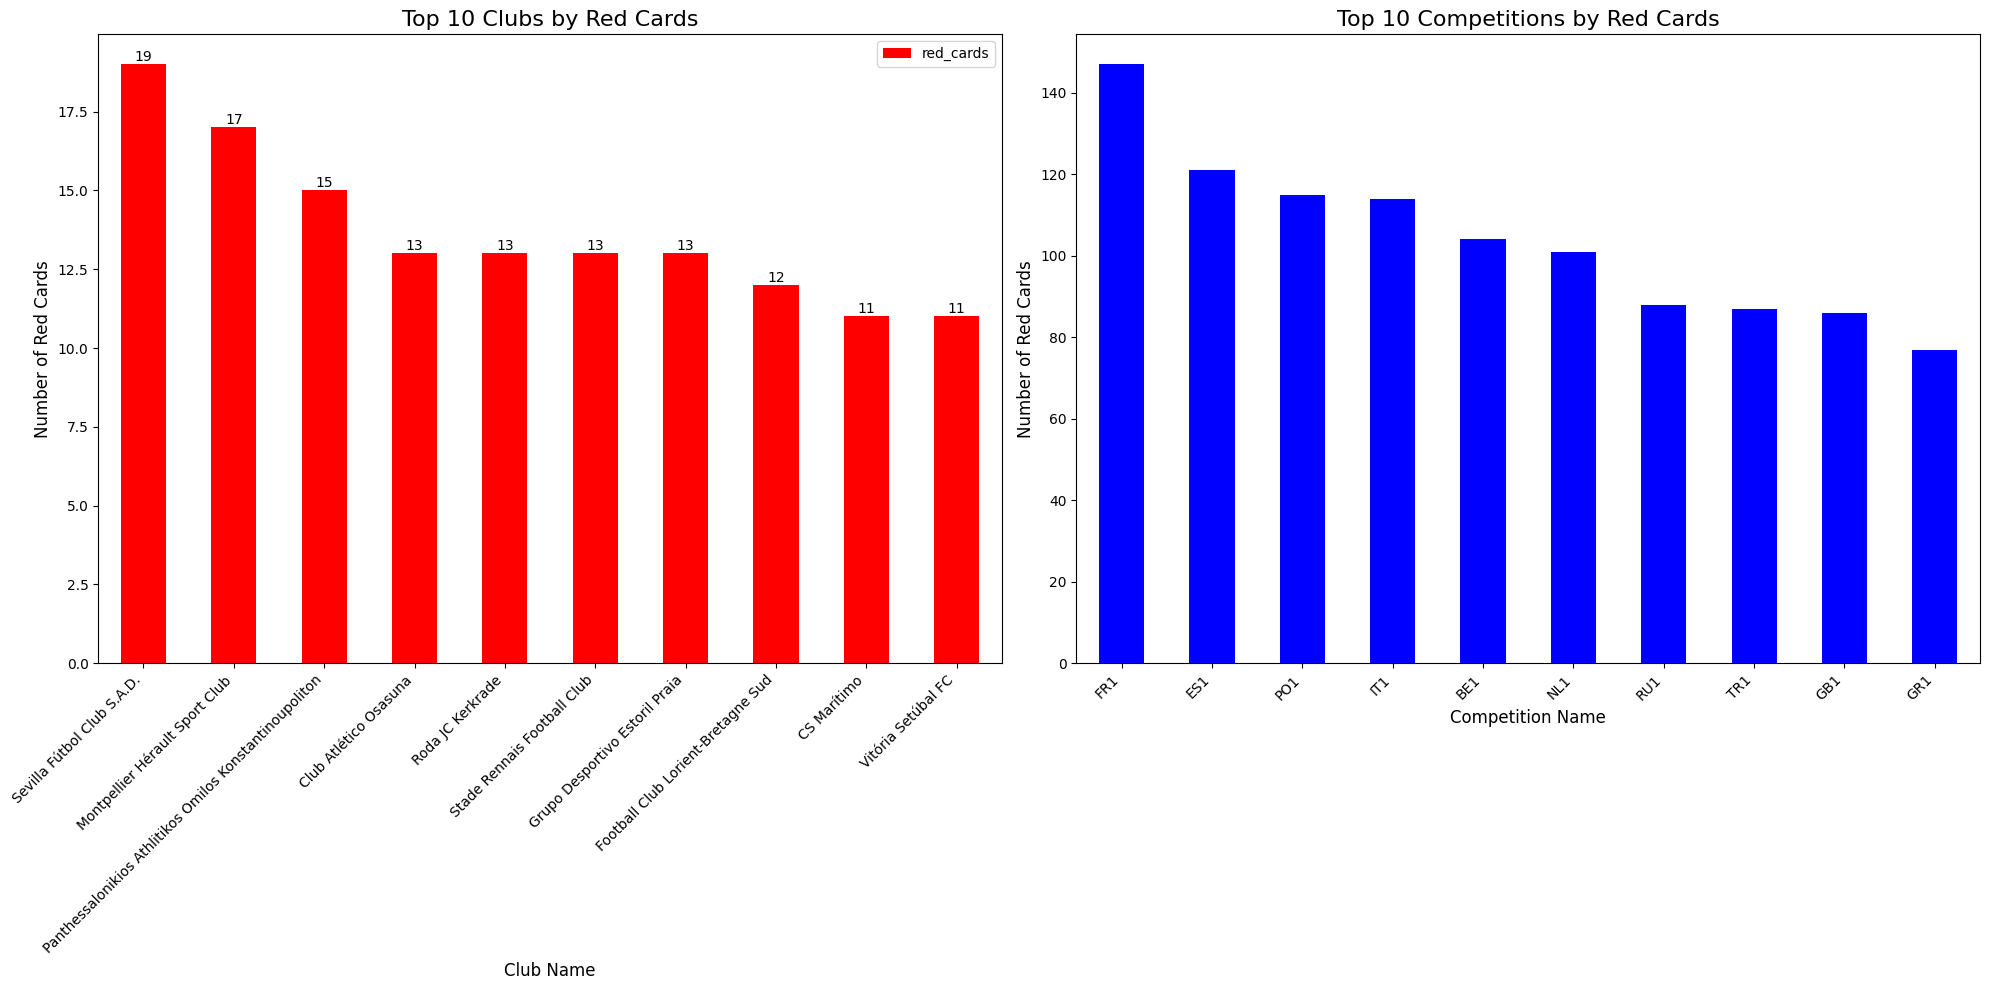

In [64]:
# Merge club names
clubs_with_names = pd.merge(red_cards_by_club.reset_index(), clubs[['club_id', 'name']], on='club_id', how='left')
clubs_with_names = clubs_with_names.rename(columns={'name': 'club_name', 0: 'red_cards'})
red_cards_by_competition = red_cards_events.groupby('competition_id').size()


# Check for any NaN values
print(clubs_with_names.isna().sum())

# Sort and get top 10
top_10_clubs_by_red_cards = clubs_with_names.sort_values('red_cards', ascending=False).head(10)
top_10_competitions_by_red_cards = red_cards_by_competition.sort_values(ascending=False).head(10)


print(top_10_clubs_by_red_cards)
plt.figure(figsize=(20, 10))

# Create chart for top 10 clubs by red cards
plt.subplot(1, 2, 1)
ax1 = top_10_clubs_by_red_cards.plot(kind='bar', x='club_name', y='red_cards', color='red', ax=plt.gca())
plt.title('Top 10 Clubs by Red Cards', fontsize=16)
plt.xlabel('Club Name', fontsize=12)
plt.ylabel('Number of Red Cards', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adjust the subplot to make room for the club names
plt.subplots_adjust(bottom=0.2)

# Add value labels on top of each bar
for i, v in enumerate(top_10_clubs_by_red_cards['red_cards']):
    ax1.text(i, v, str(v), ha='center', va='bottom')

# Create chart for top 10 competitions by red cards
plt.subplot(1, 2, 2)
ax2 = top_10_competitions_by_red_cards.plot(kind='bar', x='competition_name', y='red_cards', color='blue', ax=plt.gca())
plt.title('Top 10 Competitions by Red Cards', fontsize=16)
plt.xlabel('Competition Name', fontsize=12)
plt.ylabel('Number of Red Cards', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adjust the subplot to make room for the competition names
plt.subplots_adjust(bottom=0.2)

plt.tight_layout()
plt.show()


Number of clubs with red cards not found in clubs data: 236
Sample of missing club IDs: [4096, 1028, 18950, 4103, 9, 2573, 14, 2575, 5648, 1045]
     club_id  red_cards  games_played             club_name  \
465    12066          2           3.0  Unknown Club (12066)   
309     2725          1           2.0   Unknown Club (2725)   
316     2785          1           2.0   Unknown Club (2785)   
471    12700          1           2.0  Unknown Club (12700)   
535    35164          1           2.0  Unknown Club (35164)   
559    90988          1           3.0  Unknown Club (90988)   
377     4007          1           3.0   Unknown Club (4007)   
543    45323          1           3.0  Unknown Club (45323)   
504    23336          3          11.0  Unknown Club (23336)   
522    28958          2           8.0  Unknown Club (28958)   

     red_cards_per_game  
465            0.666667  
309            0.500000  
316            0.500000  
471            0.500000  
535            0.500000  
559  

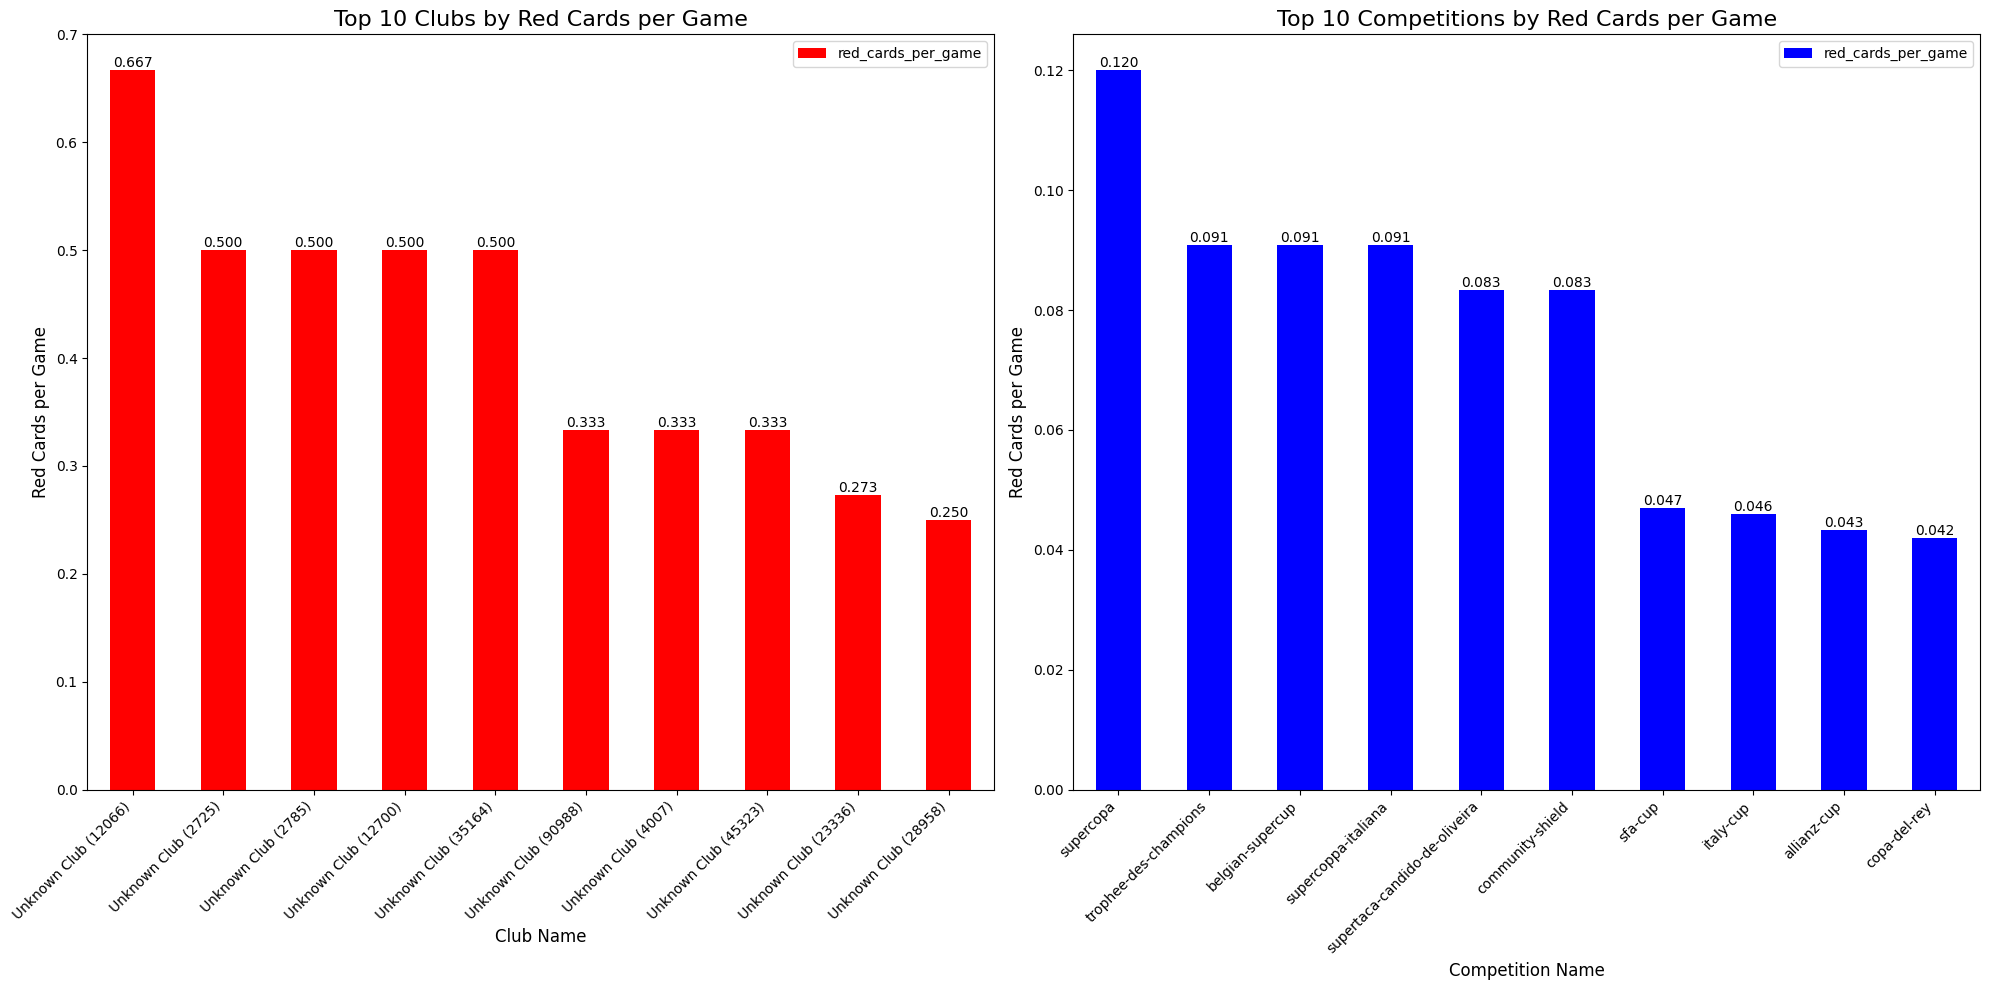

In [65]:
red_card_club_ids = set(red_cards_by_club.index)
clubs_ids = set(clubs['club_id'])
missing_clubs = red_card_club_ids - clubs_ids

print(f"Number of clubs with red cards not found in clubs data: {len(missing_clubs)}")
print("Sample of missing club IDs:", list(missing_clubs)[:10])
# Create a dictionary mapping club_id to club_name
club_id_to_name = clubs.set_index('club_id')['name'].to_dict()

# Function to get club name, returning 'Unknown Club' if not found
def get_club_name(club_id):
    return club_id_to_name.get(club_id, f'Unknown Club ({club_id})')

# Count games per club
games_per_club = pd.DataFrame(games.groupby('home_club_id').size() + games.groupby('away_club_id').size()).reset_index()
games_per_club.columns = ['club_id', 'games_played']

# Prepare club data with red cards and games played
clubs_with_data = red_cards_by_club.reset_index()
clubs_with_data = clubs_with_data.rename(columns={0: 'red_cards'})
clubs_with_data = pd.merge(clubs_with_data, games_per_club, on='club_id', how='left')

# Add club names
clubs_with_data['club_name'] = clubs_with_data['club_id'].apply(get_club_name)

# Calculate red cards per game
clubs_with_data['red_cards_per_game'] = clubs_with_data['red_cards'] / clubs_with_data['games_played']

top_10_clubs_by_red_cards = clubs_with_data.sort_values('red_cards_per_game', ascending=False).head(10)

print(top_10_clubs_by_red_cards)
plt.figure(figsize=(20, 10))

# chart for top 10 clubs by red cards per game
plt.subplot(1, 2, 1)
ax1 = top_10_clubs_by_red_cards.plot(kind='bar', x='club_name', y='red_cards_per_game', color='red', ax=plt.gca())
plt.title('Top 10 Clubs by Red Cards per Game', fontsize=16)
plt.xlabel('Club Name', fontsize=12)
plt.ylabel('Red Cards per Game', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Space for the club names
plt.subplots_adjust(bottom=0.3)

# Show akso value labels on top of each bar
for i, v in enumerate(top_10_clubs_by_red_cards['red_cards_per_game']):
    ax1.text(i, v, f'{v:.3f}', ha='center', va='bottom')

# Count games per competition
games_per_competition = games.groupby('competition_id').size().reset_index(name='games_played')

# Merge competition names and game counts
competitions_with_names = pd.merge(red_cards_by_competition.reset_index(), competitions[['competition_id', 'name']], on='competition_id', how='left')
competitions_with_names = competitions_with_names.rename(columns={'name': 'competition_name', 0: 'red_cards'})
competitions_with_names = pd.merge(competitions_with_names, games_per_competition, on='competition_id', how='left')

# Calculate red cards per game
competitions_with_names['red_cards_per_game'] = competitions_with_names['red_cards'] / competitions_with_names['games_played']

# Sort and get top 10
top_10_competitions_by_red_cards = competitions_with_names.sort_values('red_cards_per_game', ascending=False).head(10)

print(top_10_competitions_by_red_cards)

plt.subplot(1, 2, 2)
ax2 = top_10_competitions_by_red_cards.plot(kind='bar', x='competition_name', y='red_cards_per_game', color='blue', ax=plt.gca())
plt.title('Top 10 Competitions by Red Cards per Game', fontsize=16)
plt.xlabel('Competition Name', fontsize=12)
plt.ylabel('Red Cards per Game', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adjust the subplot to make room for the competition names
plt.subplots_adjust(bottom=0.2)

# Add value labels on top of each bar
for i, v in enumerate(top_10_competitions_by_red_cards['red_cards_per_game']):
    ax2.text(i, v, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Considerazioni
C'è un missmatch per alcuni club (clubId non trova riscontro)
Inoltre, il dato riportato sopra in valore assoluto era impreciso in quanto non era normalizzato rispetto al numero di partite.
Si può notare come il numero dic artellini rossi per partita sia maggiore nella super coppa di spagna

# Insights avanzati


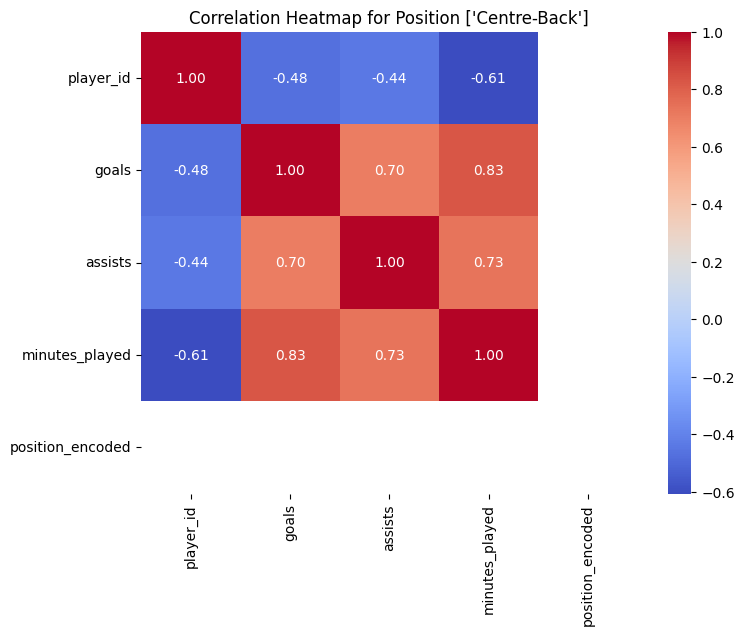

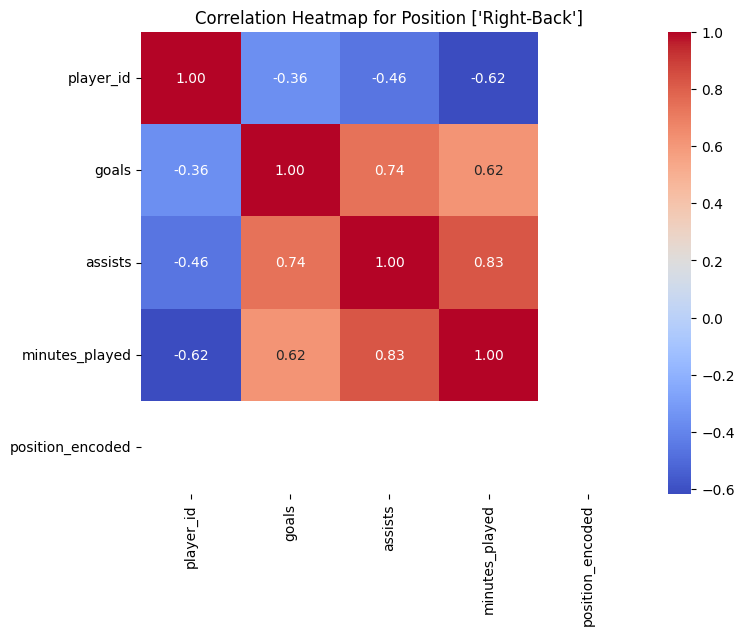

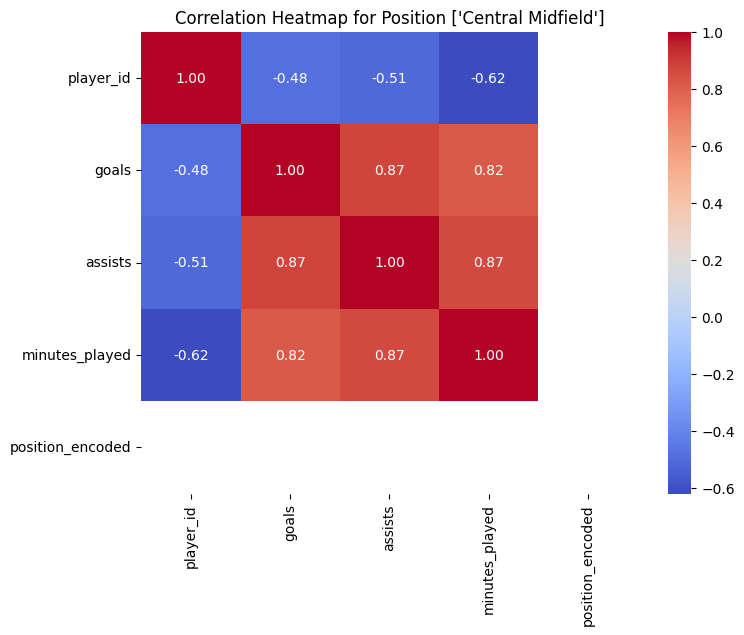

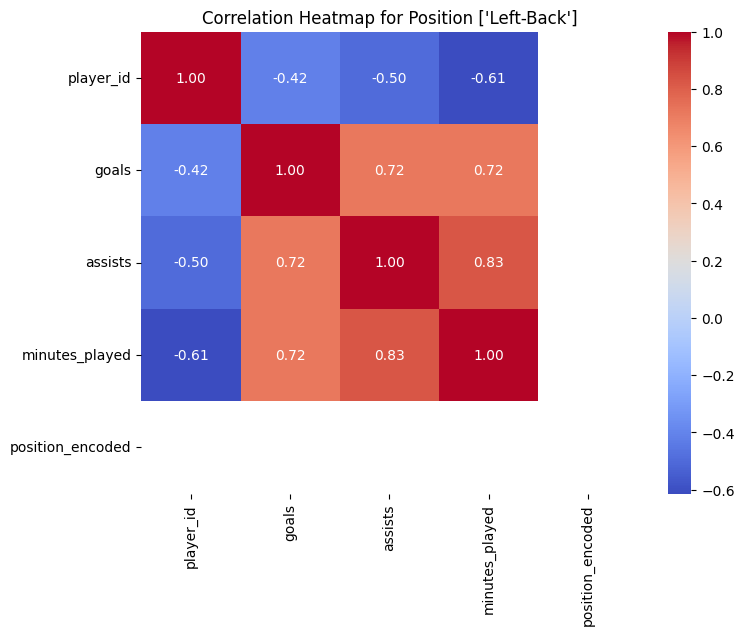

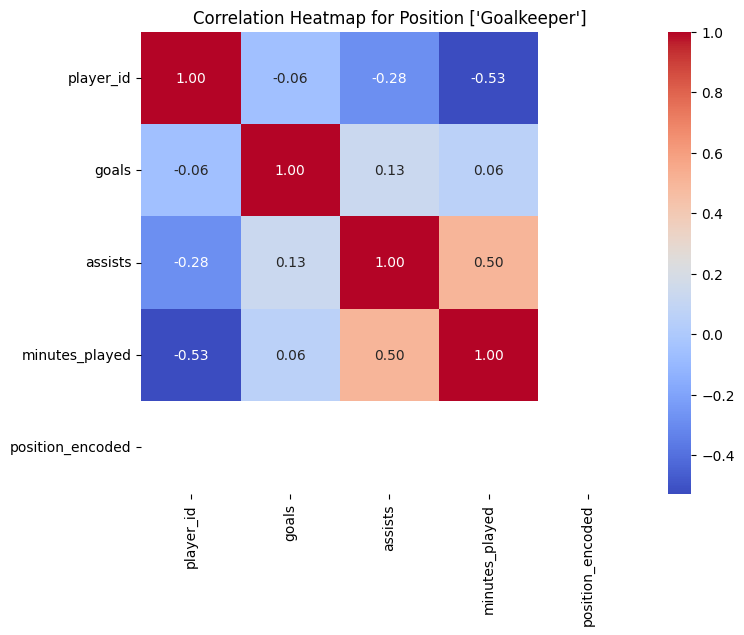

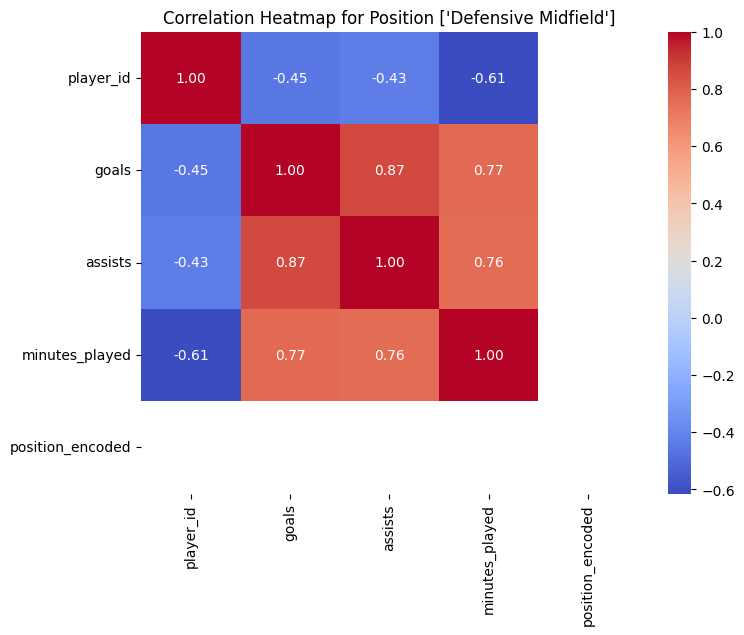

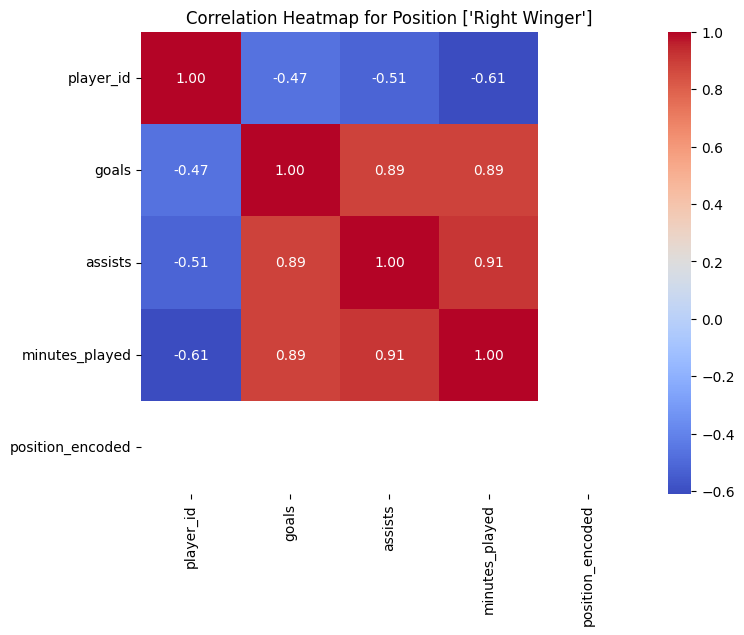

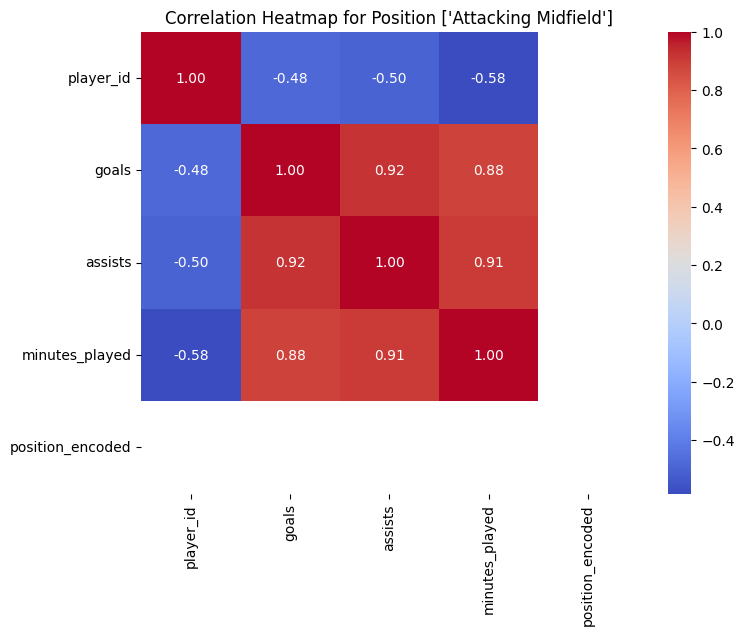

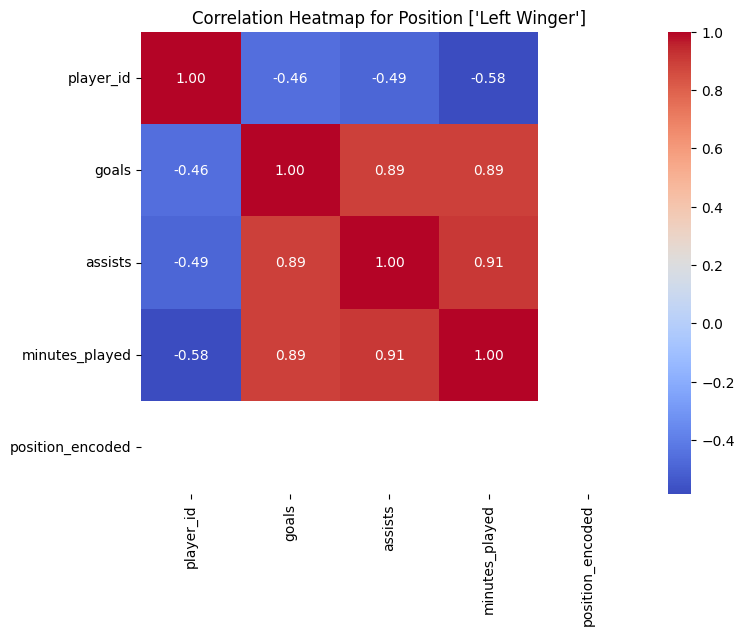

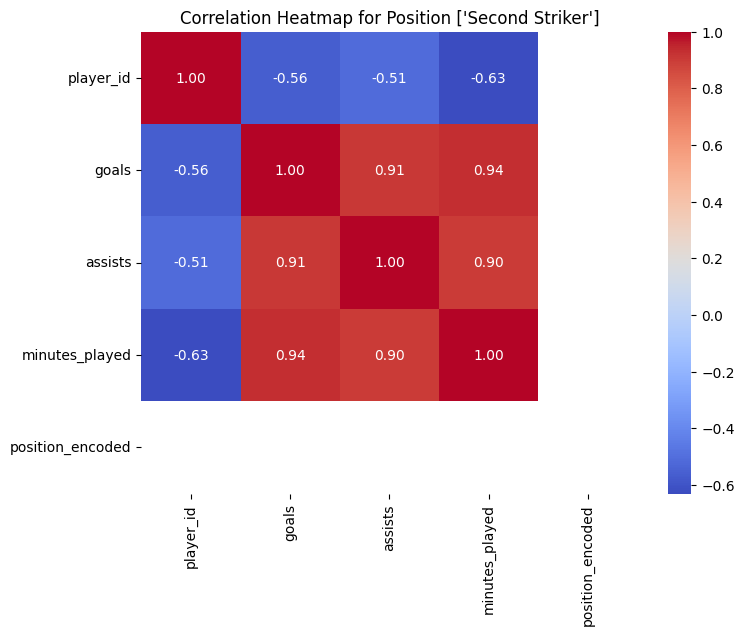

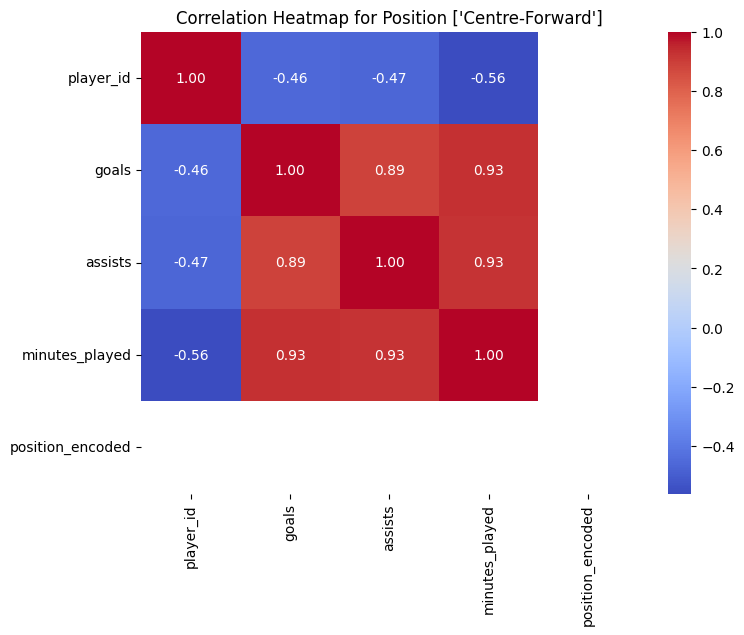

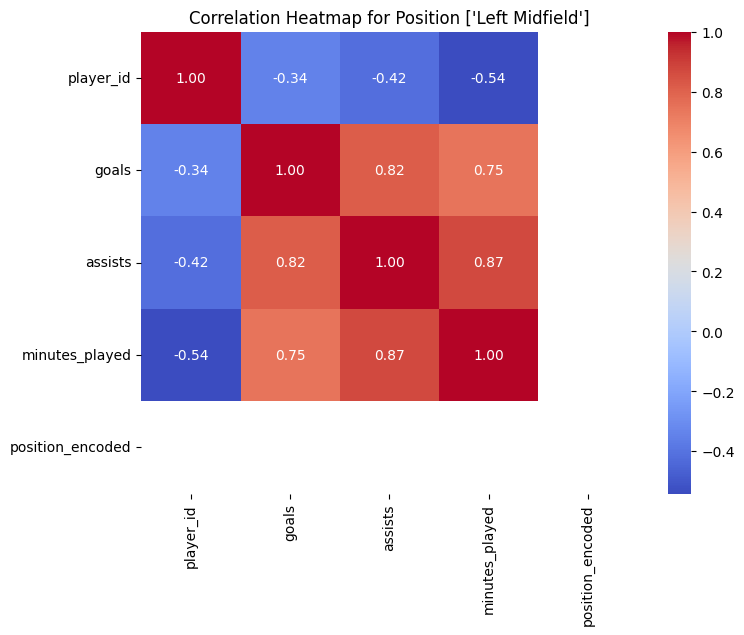

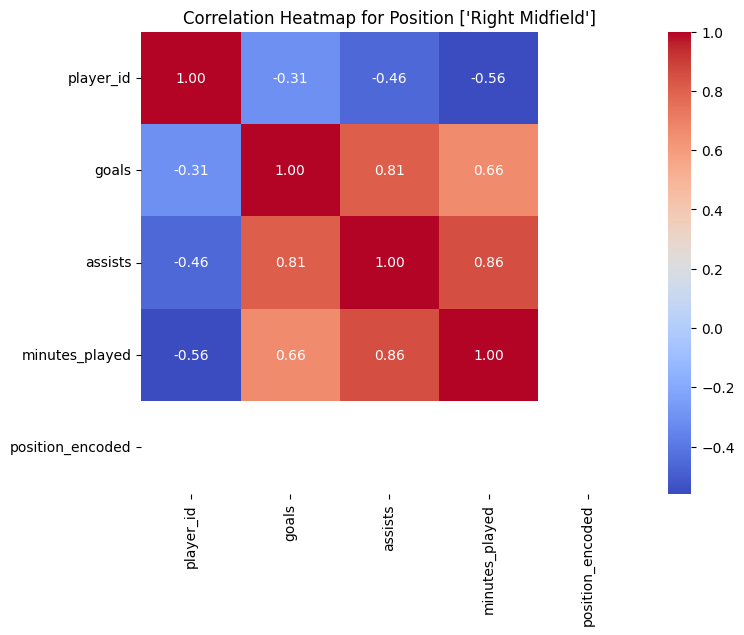

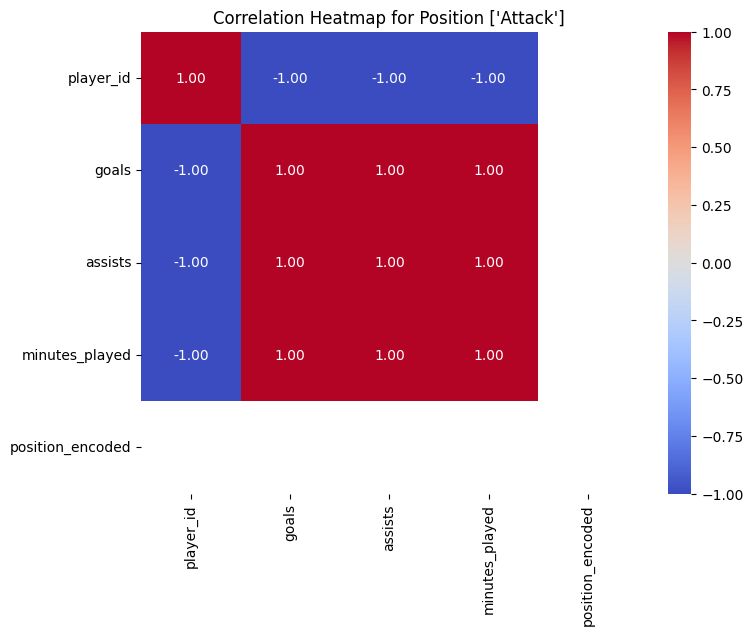

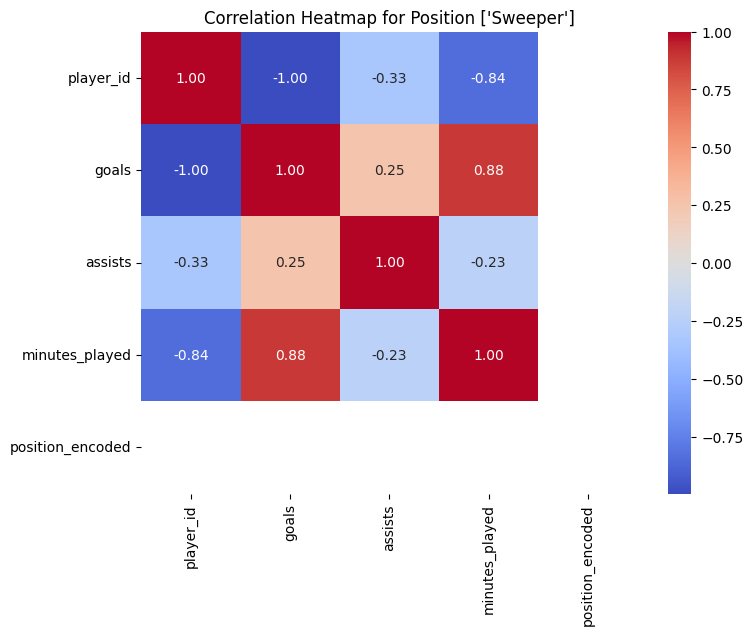

In [66]:
from sklearn.preprocessing import LabelEncoder

# Merge player_performance DataFrame with game_lineups DataFrame to get player positions
player_performance_with_position = pd.merge(player_performance, game_lineups[['player_id', 'position']], on='player_id', how='left')

# Drop rows with missing positions
player_performance_with_position.dropna(subset=['position'], inplace=True)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'position' column in player_performance_with_position DataFrame
player_performance_with_position['position_encoded'] = label_encoder.fit_transform(player_performance_with_position['position'])

# Define a function to calculate correlations for a specific position
def position_correlation(position_encoded):
    # Filter data for the specified position
    position_data = player_performance_with_position[player_performance_with_position['position_encoded'] == position_encoded]

    # AVoid non-numeric columns
    numeric_data = position_data.select_dtypes(include=['float64', 'int64'])

    # Calculate correlations
    correlation_matrix = numeric_data.corr()
    position_name = label_encoder.inverse_transform([position_encoded])
    # Heatmap correlations
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap for Position {position_name}')
    plt.show()

# List of encoded positions
encoded_positions = player_performance_with_position['position_encoded'].unique()

# Calculate and plot correlations for each position
for position_encoded in encoded_positions:
    position_correlation(position_encoded)




## Considerazioni
La matrice di correlazione calcolata per ogni ruolo è utile a verificare diverse osservazioni:
- Per tutti i ruoli al crescere dei minuti giocati, crescono i goal
- Per gli attacanti si ha una elevata correlazione con il numero di goal rispetto ad assist e minuti di gioco
- In misura lievemente minore lo stesso vale per centrocampisti di entrambe la fasce
- Tale correlazione con goal e assist viene meno per difensori e quasi nulla per i portieri come è lecito aspettarsi

In [67]:
""" Out of memory, optimized version below
# Merge appearances with game_lineups to get positions
appearances_with_positions = appearances.merge(game_lineups[['game_id', 'player_id', 'position']], on=['game_id', 'player_id'], how='left')

# Merge the combined DataFrame with players to get height and foot
player_stats = appearances_with_positions.merge(players[['player_id', 'height_in_cm', 'foot']], on='player_id', how='left')

# Merge player stats with valuations
player_stats_with_value = player_stats.merge(player_valuations[['player_id', 'market_value_in_eur']], on='player_id', how='left')

# Check for NaNs and handle them
player_stats_with_value = player_stats_with_value.dropna(subset=['height_in_cm', 'foot', 'goals', 'assists', 'minutes_played', 'yellow_cards', 'red_cards'])

# Calculate the performance score
player_stats_with_value['performance_score'] = (
    3 * player_stats_with_value['goals'] +
    1 * player_stats_with_value['assists'] -
    0.5 * player_stats_with_value['yellow_cards'] -
    1 * player_stats_with_value['red_cards']
)

# Calculate the ratio of performance score to market value
player_stats_with_value['value_performance_ratio'] = player_stats_with_value['performance_score'] / player_stats_with_value['market_value_in_eur']

# Identify undervalued players
undervalued_players = player_stats_with_value.sort_values(by='value_performance_ratio', ascending=False).head(10)

# Display the results
print("\nUndervalued Players:")
print(undervalued_players[['player_name', 'goals', 'assists', 'yellow_cards', 'red_cards', 'performance_score', 'market_value_in_eur', 'value_performance_ratio']])"""

' Out of memory, optimized version below\n# Merge appearances with game_lineups to get positions\nappearances_with_positions = appearances.merge(game_lineups[[\'game_id\', \'player_id\', \'position\']], on=[\'game_id\', \'player_id\'], how=\'left\')\n\n# Merge the combined DataFrame with players to get height and foot\nplayer_stats = appearances_with_positions.merge(players[[\'player_id\', \'height_in_cm\', \'foot\']], on=\'player_id\', how=\'left\')\n\n# Merge player stats with valuations\nplayer_stats_with_value = player_stats.merge(player_valuations[[\'player_id\', \'market_value_in_eur\']], on=\'player_id\', how=\'left\')\n\n# Check for NaNs and handle them\nplayer_stats_with_value = player_stats_with_value.dropna(subset=[\'height_in_cm\', \'foot\', \'goals\', \'assists\', \'minutes_played\', \'yellow_cards\', \'red_cards\'])\n\n# Calculate the performance score\nplayer_stats_with_value[\'performance_score\'] = (\n    3 * player_stats_with_value[\'goals\'] + \n    1 * player_stats_

In [68]:
import pandas as pd
# Define useful columns to avoid oom
useful_cols = [
    'player_id', 'foot', 'player_name', 'goals', 'assists', 'yellow_cards', 'red_cards',
    'performance_score', 'market_value_in_eur', 'value_performance_ratio', 'age', 'position_encoded', 'height_in_cm'
]

# Define chunk size
chunksize = 200000  # To avoid oom while processing, using chuck processing

# Reduce memory overead by converting columns to appropriate data types
players['player_id'] = players['player_id'].astype('int32')
players['height_in_cm'] = pd.to_numeric(players['height_in_cm'], errors='coerce')
players['foot'] = players['foot'].astype('category')
players['height_in_cm'].fillna(-1, inplace=True)
players['height_in_cm'] = players['height_in_cm'].astype('int32')

# Initialize an empty DataFrame to store results
final_results = pd.DataFrame()

# Process appearances in chunks
for chunk in pd.read_csv('appearances.csv', chunksize=chunksize):
    chunk['game_id'] = chunk['game_id'].astype('int32')
    chunk['player_id'] = chunk['player_id'].astype('int32')

    # Merge appearances with game_lineups to get positions
    appearances_with_positions = chunk.merge(
        game_lineups[['game_id', 'player_id', 'position']].astype({'game_id': 'int32', 'player_id': 'int32'}),
        on=['game_id', 'player_id'],
        how='left'
    )

    #print(f"{appearances_with_positions.columns}-{useful_cols}")
    # Drop unnecessary columns
    useless_col = list(set(list(appearances_with_positions.columns)) - set(useful_cols))

    appearances_with_positions.drop(columns=useless_col, inplace=True, errors='ignore')

    # Merge the combined DataFrame with players to get height and foot
    player_stats = appearances_with_positions.merge(
        players[['player_id', 'height_in_cm', 'foot']].astype({'player_id': 'int32', 'height_in_cm': 'int32'}),
        on='player_id',
        how='left'
    )


    # Merge player stats with valuations
    player_stats_with_value = player_stats.merge(
        player_valuations[['player_id', 'market_value_in_eur']].astype({'player_id': 'int32', 'market_value_in_eur': 'float64'}),
        on='player_id',
        how='left'
    )

    useless_col = list(set(list(player_stats_with_value.columns)) - set(useful_cols))

    #print(f"{player_stats_with_value.columns}-{useful_cols}")

    player_stats_with_value.drop(columns=useless_col, inplace=True, errors='ignore')

    # Drop rows with missing values
    player_stats_with_value.dropna(
        subset=['height_in_cm', 'foot', 'goals', 'assists', 'market_value_in_eur'],
        inplace=True
    )

    #print(f"Columns at the end for player_statswithvalu:{player_stats_with_value.columns}")

    # Calculate the performance score
    player_stats_with_value['performance_score'] = (
        3 * player_stats_with_value['goals'] +
        1 * player_stats_with_value['assists'] -
        0.5 * player_stats_with_value['yellow_cards'] -
        1 * player_stats_with_value['red_cards']
    )

    # Calculate the ratio of performance score to market value
    player_stats_with_value['value_performance_ratio'] = (
        player_stats_with_value['performance_score'] / player_stats_with_value['market_value_in_eur']
    )

    # Concatenate chunk results into final DataFrame
    final_results = pd.concat([final_results, player_stats_with_value], ignore_index=True)

# Identify undervalued players
undervalued_players = final_results.nlargest(10, 'value_performance_ratio')

performant_players = final_results.nlargest(10, 'performance_score')

# Display the results
print("\nUndervalued Players:")
print(undervalued_players[[
    'player_name', 'goals', 'assists', 'yellow_cards', 'red_cards',
    'performance_score', 'market_value_in_eur', 'value_performance_ratio'
]])

print("\n PErformant Players:")
print(performant_players[[
    'player_name', 'goals', 'assists', 'yellow_cards', 'red_cards',
    'performance_score', 'market_value_in_eur', 'value_performance_ratio'
]])




Undervalued Players:
              player_name  goals  assists  yellow_cards  red_cards  \
34252861    Eamonn Brophy      2        2             0          0   
1871653    Manuel Pascali      2        0             0          0   
2073001      Guille Pérez      2        0             0          0   
2073002      Guille Pérez      2        0             0          0   
2073003      Guille Pérez      2        0             0          0   
2073004      Guille Pérez      2        0             0          0   
2931168    Marc McAusland      2        0             0          0   
6639865   Alhassane Keita      2        0             0          0   
20760940   Emmanuel Ogude      5        0             0          0   
13137381  Vincent Janssen      4        1             0          0   

          performance_score  market_value_in_eur  value_performance_ratio  
34252861                8.0              13000.0                 0.000615  
1871653                 6.0              10000.0       

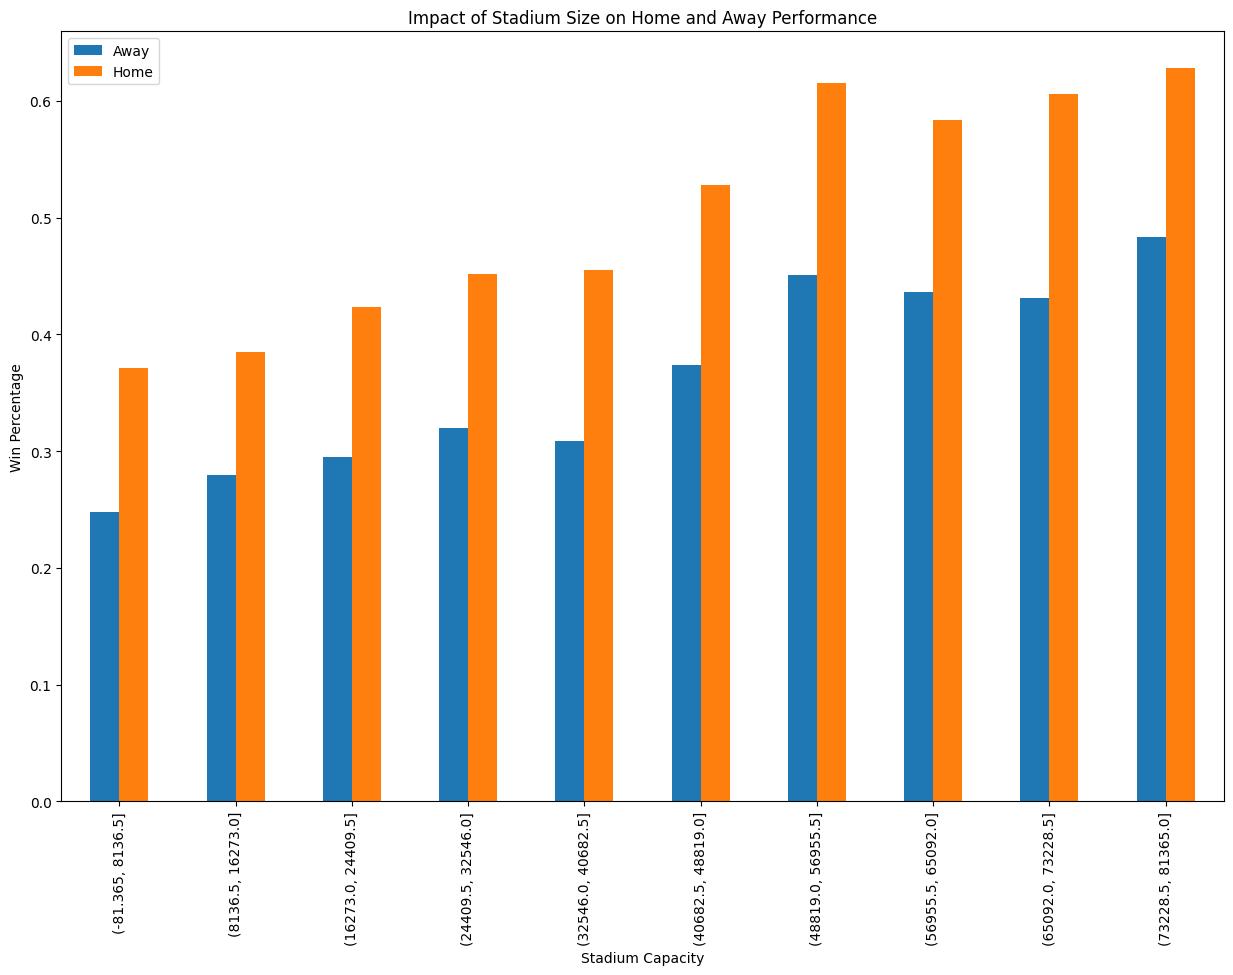

In [69]:
# Impact of stadium seats and performance
# Merge club info with games
home_games = pd.merge(games, clubs[['club_id', 'stadium_seats']], left_on='home_club_id', right_on='club_id')
home_games['is_home'] = True
away_games = pd.merge(games, clubs[['club_id', 'stadium_seats']], left_on='away_club_id', right_on='club_id')
away_games['is_home'] = False

all_games = pd.concat([home_games, away_games])

# Calculate win percentage
all_games['win'] = ((all_games['is_home'] & (all_games['home_club_goals'] > all_games['away_club_goals'])) |
                    (~all_games['is_home'] & (all_games['away_club_goals'] > all_games['home_club_goals'])))

# Group by stadium size and home/away
stadium_performance = all_games.groupby([pd.cut(all_games['stadium_seats'], bins=10), 'is_home'])['win'].mean().unstack()

# Plot stadium impact on performance
stadium_performance.plot(kind='bar', figsize=(15, 10))
plt.title('Impact of Stadium Size on Home and Away Performance')
plt.xlabel('Stadium Capacity')
plt.ylabel('Win Percentage')
plt.legend(['Away', 'Home'])
plt.show()

## Analisi competitività

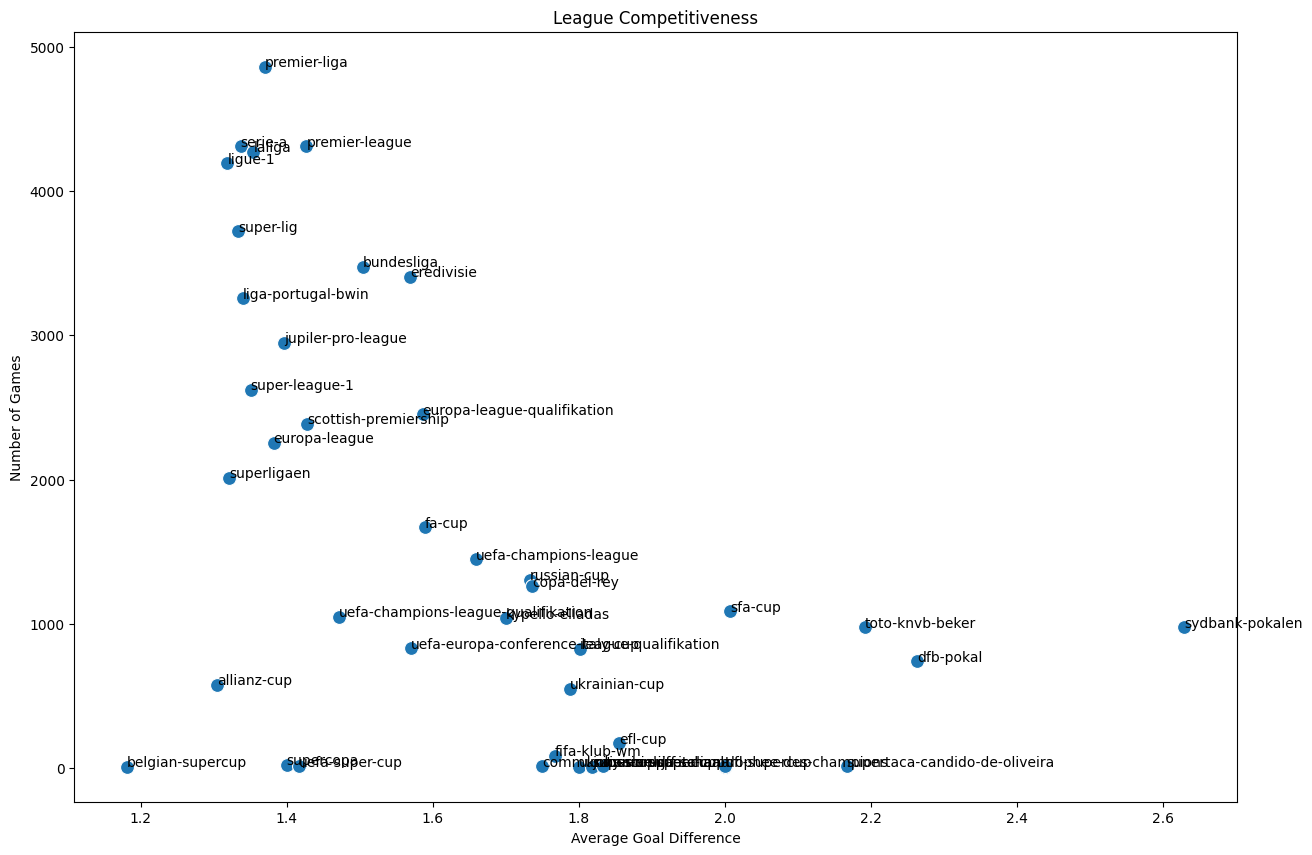

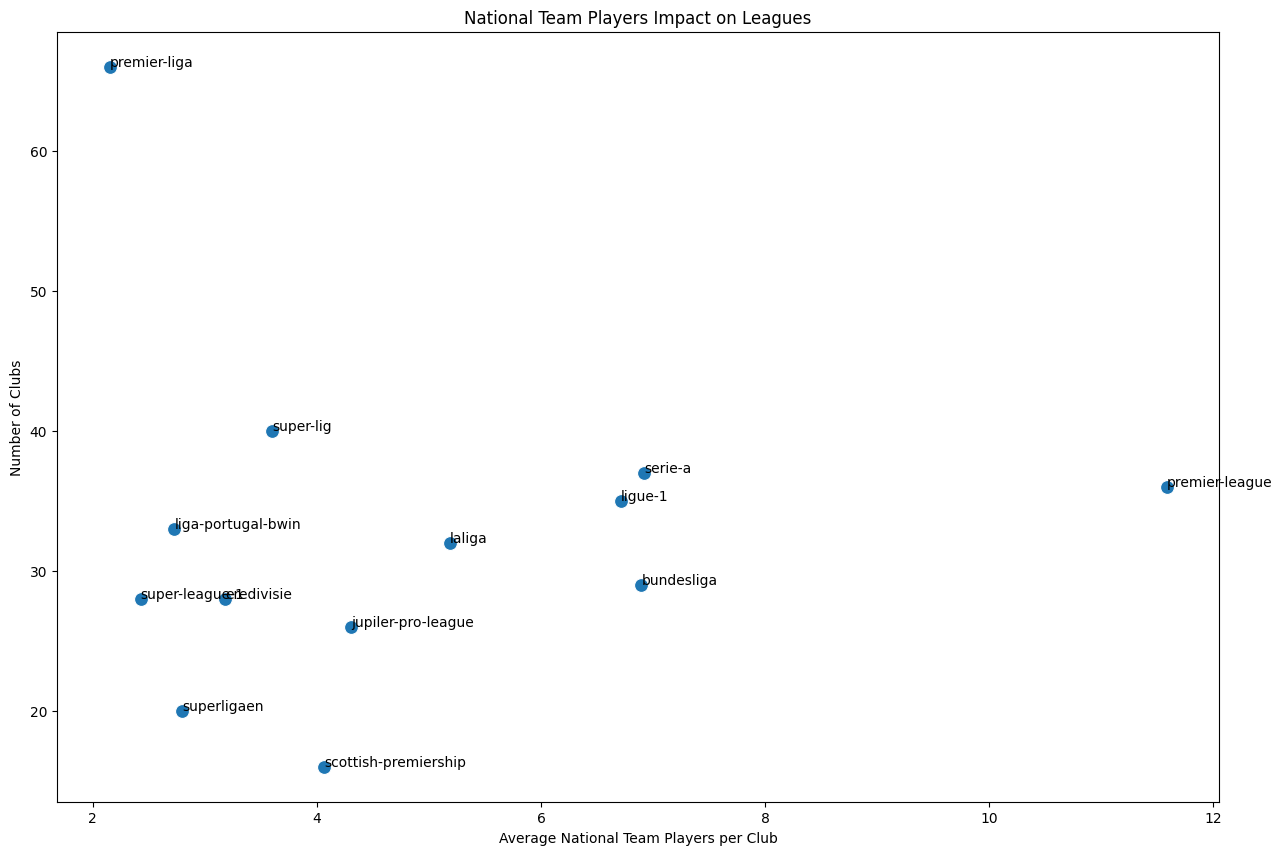

In [70]:
# Merge competition info with games
games_with_comp = pd.merge(games, competitions[['competition_id', 'name', 'country_id']], on='competition_id')

# Calculate goal difference
games_with_comp['goal_difference'] = abs(games_with_comp['home_club_goals'] - games_with_comp['away_club_goals'])

# Analyze competitiveness by league
competitiveness = games_with_comp.groupby('name').agg({
    'goal_difference': 'mean',
    'game_id': 'count'
}).sort_values('goal_difference')

# Plot results
plt.figure(figsize=(15, 10))
sns.scatterplot(data=competitiveness, x='goal_difference', y='game_id', s=100)

for idx, row in competitiveness.iterrows():
    plt.annotate(idx, (row['goal_difference'], row['game_id']))

plt.title('League Competitiveness')
plt.xlabel('Average Goal Difference')
plt.ylabel('Number of Games')
plt.show()

# Study national team players
clubs_with_national_players = pd.merge(clubs[['club_id', 'domestic_competition_id', 'national_team_players']],
                                       competitions[['competition_id', 'name']],
                                       left_on='domestic_competition_id',
                                       right_on='competition_id')

national_players_impact = clubs_with_national_players.groupby('name').agg({
    'national_team_players': 'mean',
    'club_id': 'count'
}).sort_values('national_team_players', ascending=False)

plt.figure(figsize=(15, 10))
sns.scatterplot(data=national_players_impact, x='national_team_players', y='club_id', s=100)

for idx, row in national_players_impact.iterrows():
    plt.annotate(idx, (row['national_team_players'], row['club_id']))

plt.title('National Team Players Impact on Leagues')
plt.xlabel('Average National Team Players per Club')
plt.ylabel('Number of Clubs')
plt.show()

## Correlazione tra età e ruolo, e ruolo e piede

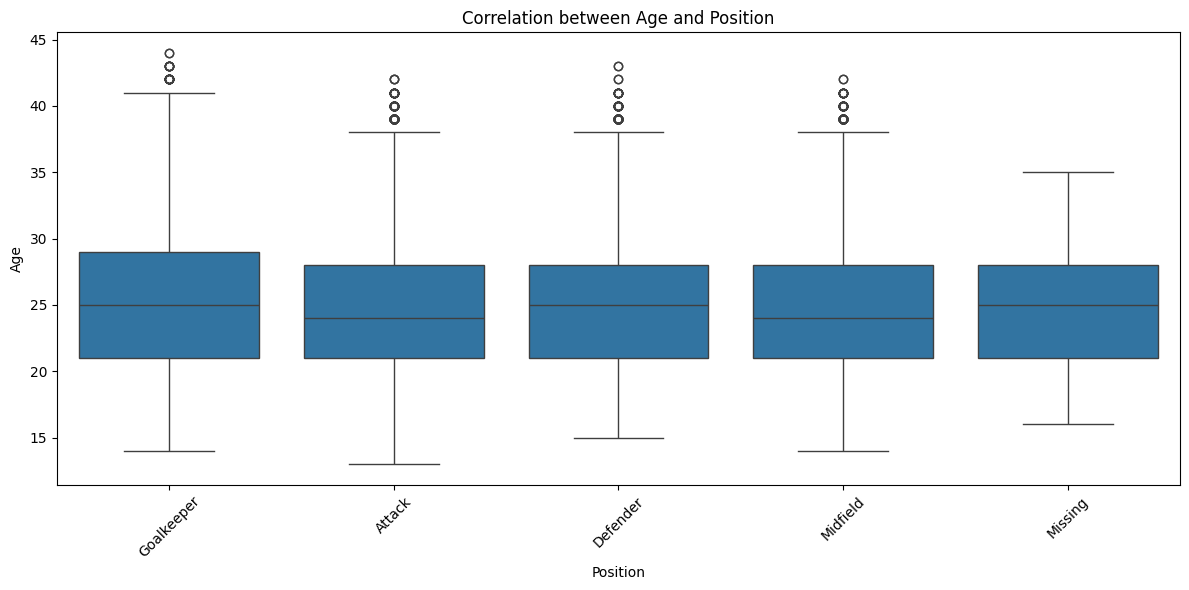

<Figure size 1200x600 with 0 Axes>

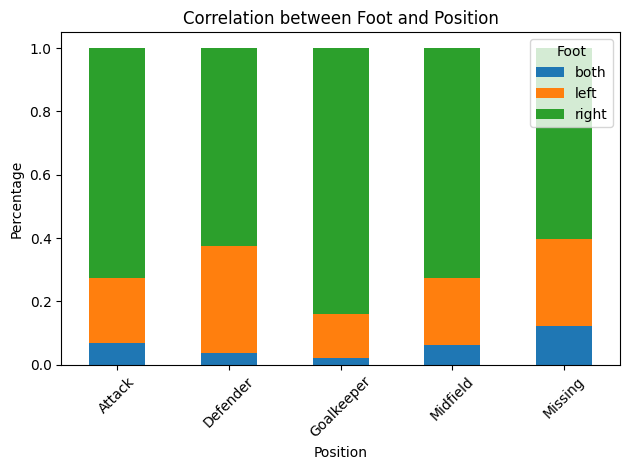

In [71]:
from datetime import datetime

# Merge players and player_valuations dataframes
player_data = pd.merge(players, player_valuations, on='player_id', how='inner')

# Convert date columns to datetime
player_data['date_of_birth'] = pd.to_datetime(player_data['date_of_birth'])
player_data['date'] = pd.to_datetime(player_data['date'])

# Calculate age at valuation
def calculate_age(born, valuation_date):
    return valuation_date.year - born.year - ((valuation_date.month, valuation_date.day) < (born.month, born.day))

player_data['age'] = player_data.apply(lambda row: calculate_age(row['date_of_birth'], row['date']), axis=1)

# Correlation age/pos
plt.figure(figsize=(12, 6))
sns.boxplot(x='position', y='age', data=player_data)
plt.title('Correlation between Age and Position')
plt.xlabel('Position')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Correlation foot/pos
plt.figure(figsize=(12, 6))
foot_role = pd.crosstab(player_data['position'], player_data['foot'])
foot_role_percentage = foot_role.div(foot_role.sum(axis=1), axis=0)
foot_role_percentage.plot(kind='bar', stacked=True)
plt.title('Correlation between Foot and Position')
plt.xlabel('Position')
plt.ylabel('Percentage')
plt.legend(title='Foot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Considerazioni
Come è intuibile, l'età dei portieri raggiunge valori notevolmente più alti. Inoltre i difensori hanno maggiore varietà nel piede preferito.

## Geolocalization analysys

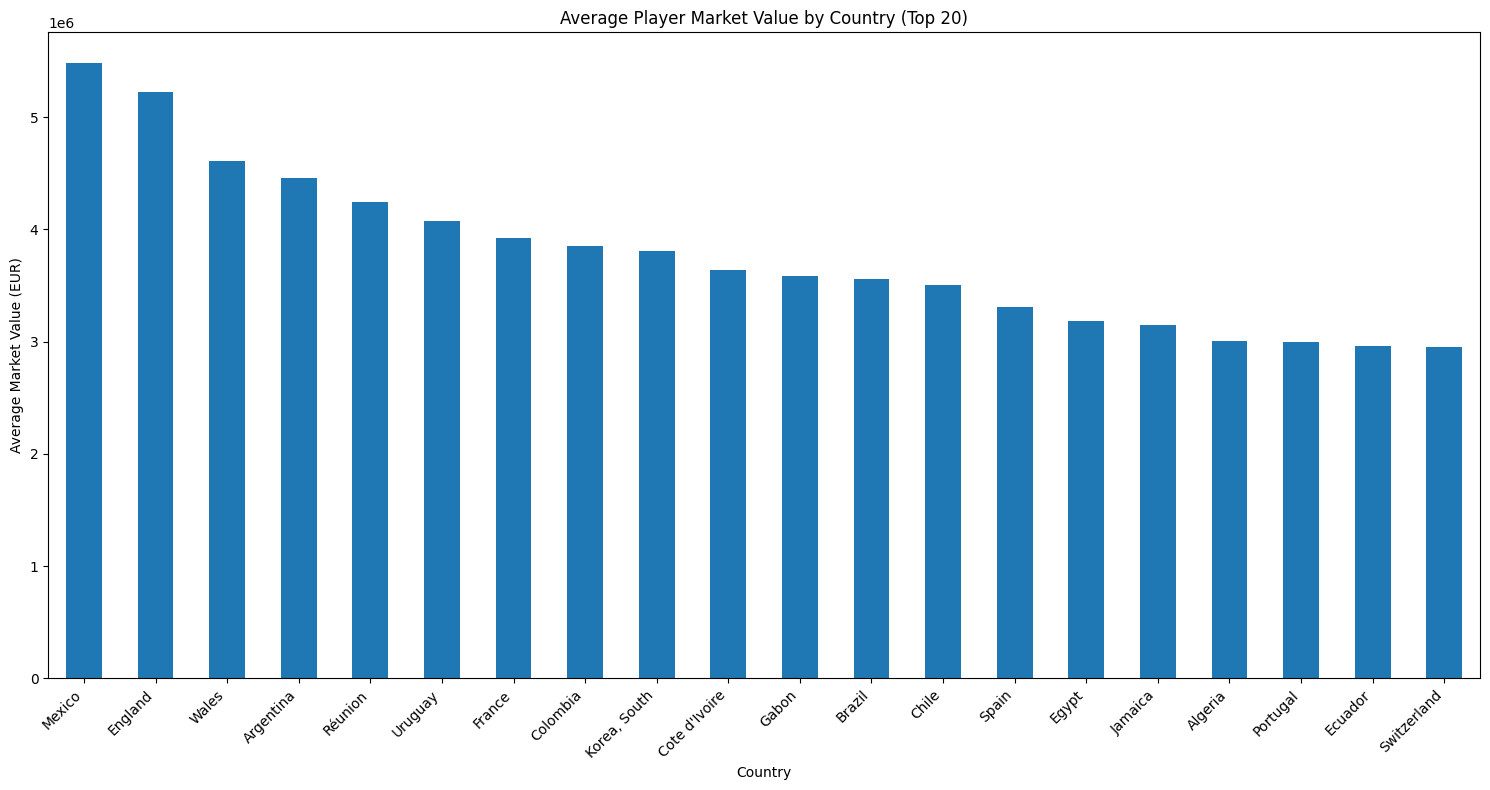

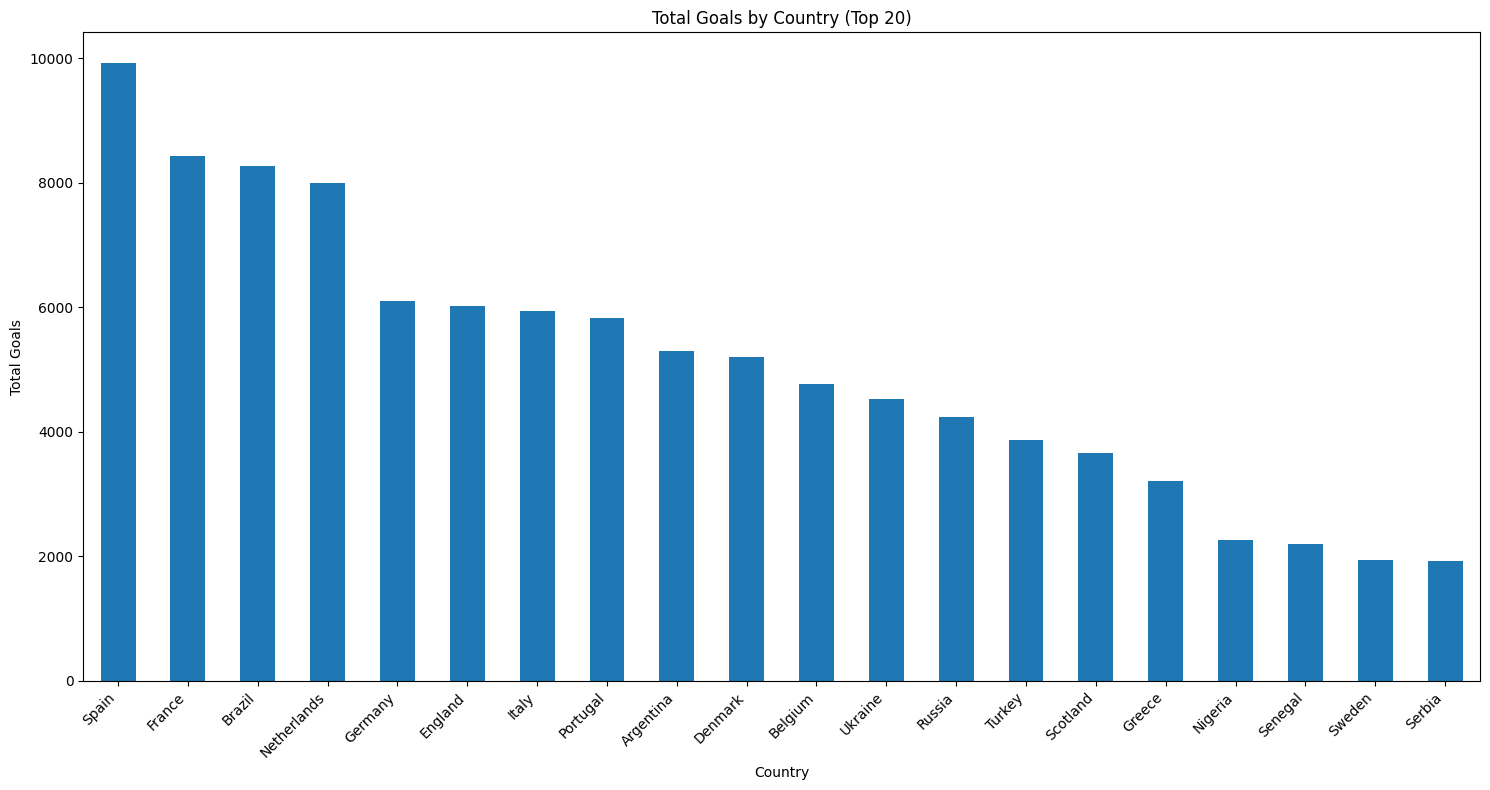

<Figure size 1500x1000 with 0 Axes>

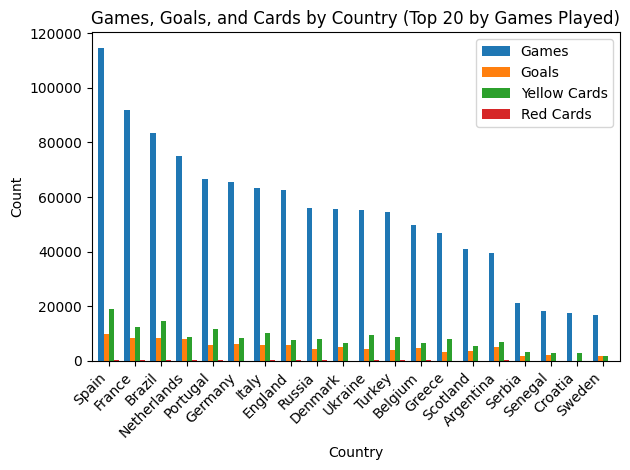

<Figure size 1500x1000 with 0 Axes>

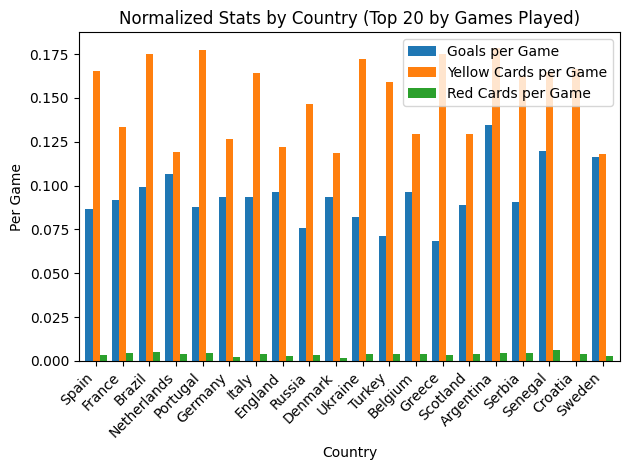

Top 5 Countries by Goals per Game:
country_of_citizenship
Argentina      0.134386
Senegal        0.119823
Sweden         0.116548
Netherlands    0.106609
Brazil         0.099032
Name: Goals per Game, dtype: float64

Top 5 Countries by Yellow Cards per Game:
country_of_citizenship
Argentina    0.178487
Portugal     0.177463
Greece       0.175070
Brazil       0.174780
Ukraine      0.172155
Name: Yellow Cards per Game, dtype: float64

Top 5 Countries by Red Cards per Game:
country_of_citizenship
Senegal      0.006174
Brazil       0.004901
France       0.004767
Argentina    0.004644
Portugal     0.004362
Name: Red Cards per Game, dtype: float64


In [73]:
# Merge relevant dataframes
player_country = players[['player_id', 'country_of_citizenship']]
player_value = player_valuations[['player_id', 'market_value_in_eur']]
player_data = pd.merge(player_country, player_value, on='player_id')

# 1. Market Value by Country
country_market_value = player_data.groupby('country_of_citizenship')['market_value_in_eur'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(15, 8))
country_market_value.plot(kind='bar')
plt.title('Average Player Market Value by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Average Market Value (EUR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Number of Goals by Country
# Merge appearances with player country data
appearances_with_country = pd.merge(appearances, player_country, on='player_id')
goals_by_country = appearances_with_country.groupby('country_of_citizenship')['goals'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(15, 8))
goals_by_country.plot(kind='bar')
plt.title('Total Goals by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Total Goals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Number of Games, Goals, and Cards by Country
games_by_country = appearances_with_country.groupby('country_of_citizenship').size()
cards_by_country = appearances_with_country.groupby('country_of_citizenship')[['yellow_cards', 'red_cards']].sum()
country_stats = pd.concat([games_by_country, goals_by_country, cards_by_country], axis=1)
country_stats.columns = ['Games', 'Goals', 'Yellow Cards', 'Red Cards']
country_stats = country_stats.sort_values('Games', ascending=False).head(20)

plt.figure(figsize=(15, 10))
country_stats.plot(kind='bar', width=0.8)
plt.title('Games, Goals, and Cards by Country (Top 20 by Games Played)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# 4. Normalized Stats by Country
country_stats_normalized = country_stats.copy()
country_stats_normalized['Goals per Game'] = country_stats_normalized['Goals'] / country_stats_normalized['Games']
country_stats_normalized['Yellow Cards per Game'] = country_stats_normalized['Yellow Cards'] / country_stats_normalized['Games']
country_stats_normalized['Red Cards per Game'] = country_stats_normalized['Red Cards'] / country_stats_normalized['Games']

plt.figure(figsize=(15, 10))
country_stats_normalized[['Goals per Game', 'Yellow Cards per Game', 'Red Cards per Game']].plot(kind='bar', width=0.8)
plt.title('Normalized Stats by Country (Top 20 by Games Played)')
plt.xlabel('Country')
plt.ylabel('Per Game')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Print top 5 countries for each normalized stat
print("Top 5 Countries by Goals per Game:")
print(country_stats_normalized['Goals per Game'].sort_values(ascending=False).head())
print("\nTop 5 Countries by Yellow Cards per Game:")
print(country_stats_normalized['Yellow Cards per Game'].sort_values(ascending=False).head())
print("\nTop 5 Countries by Red Cards per Game:")
print(country_stats_normalized['Red Cards per Game'].sort_values(ascending=False).head())

### Considerazioni
Il Senegal sembra avere un numero di cartellini notevole per le partite giocate. L'argentina ha invece un numero di cartellini gialli molto elevati. Risulta evidetente che ci sono più partite per le squadre spagnole e francesi.

I giocatori messicani e inglesi sembrano infine avere una notevole valutazione